In [2]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Galan\AppData\Local\Temp\ipykernel_17024\2250977813.py:1: SyntaxWarning: invalid escape sequence '\G'
  img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary


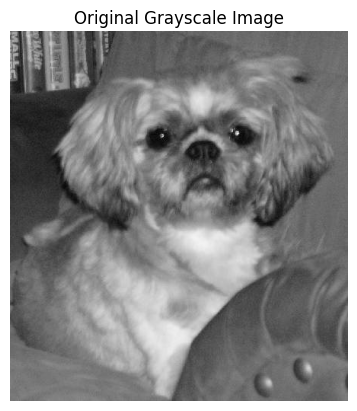

In [3]:
img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

## Image Filters

Image filters adalah teknik dalam pengolahan citra digital yang melibatkan penggunaan kernel atau matriks kecil untuk memodifikasi nilai piksel dalam citra. Filter ini digunakan untuk berbagai tujuan, seperti mengurangi noise, meningkatkan tepi, atau menerapkan efek artistik. Berikut adalah beberapa jenis filter umum yang sering digunakan dalam pengolahan citra:
1. Smoothing Filters (Low-pass filters)
2. Sharpening Filters (High-pass filters)
3. Edge Detection Filters
4. Embossing Filters
5. Custom Convolution Filters

### Filter Kernel

Filter kernel adalah matriks kecil yang digunakan dalam operasi konvolusi untuk memodifikasi nilai piksel dalam citra. Kernel ini diterapkan pada setiap piksel citra dengan cara mengalikan nilai piksel tetangga dengan nilai kernel yang sesuai, kemudian menjumlahkan hasilnya untuk mendapatkan nilai baru piksel tersebut. Kernel dapat memiliki berbagai ukuran dan bentuk, tergantung pada efek yang diinginkan.

#### Perbedaan Filter dan Point Operations
| Aspek                  | Filter Kernel                                   | Point Operations                             |
|-----------------------|-------------------------------------------------|----------------------------------------------|
| Definisi              | Menggunakan kernel untuk memodifikasi piksel berdasarkan tetangga | Memanipulasi nilai piksel secara individual tanpa mempertimbangkan tetangga |
| Operasi              | Melibatkan konvolusi dengan kernel             | Melibatkan operasi matematis langsung pada piksel |
| Efek pada Citra      | Mempengaruhi area sekitar piksel				  | Mempengaruhi hanya piksel itu sendiri         |
| Contoh                | Gaussian Blur, Sharpening, Edge Detection | Brightness Adjustment, Contrast Adjustment    |

#### Linear Filters
Linear filters adalah jenis filter yang menggunakan operasi linear pada nilai piksel dan tetangganya. Contoh umum dari linear filters adalah smoothing filters (seperti Gaussian blur) dan sharpening filters. Linear filters mempertahankan hubungan linear antara input dan output, sehingga efeknya dapat diprediksi dan dianalisis dengan mudah.


1. MATRIX PIXEL INPUT (7x7):


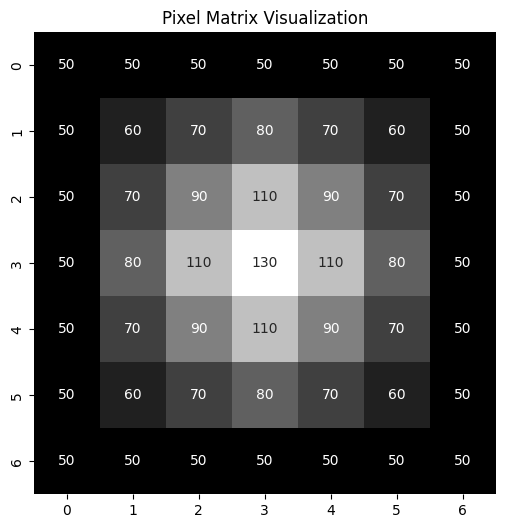

In [4]:
# Matrix pixel input (7x7)
pixel_matrix = np.array([
    [50,  50,  50,  50,  50,  50,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  80, 110, 130, 110,  80,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  50,  50,  50,  50,  50,  50]
], dtype=np.float32)

print("\n1. MATRIX PIXEL INPUT (7x7):")

# Visualisasi matrix pixel
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_matrix, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Pixel Matrix Visualization")
plt.show()


2a. AVERAGE/BOX BLUR KERNEL (3x3):


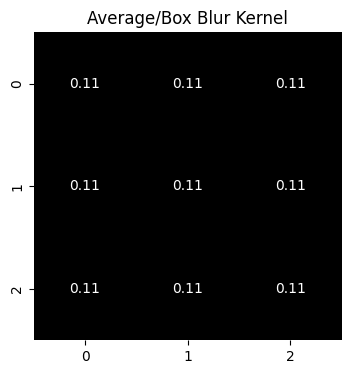

In [5]:
# 2. Definisikan berbagai kernel filter (3x3)
# a. Average/Box Blur Kernel
average_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32) / 9

print("\n2a. AVERAGE/BOX BLUR KERNEL (3x3):")

# Visualisasi kernel
plt.figure(figsize=(4, 4))
sns.heatmap(average_kernel, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Average/Box Blur Kernel")
plt.show()


Contoh Konvolusi pada Piksel Tengah [3, 3]:
Nilai Piksel Asli: 130

Region of Interest (ROI) 3x3:


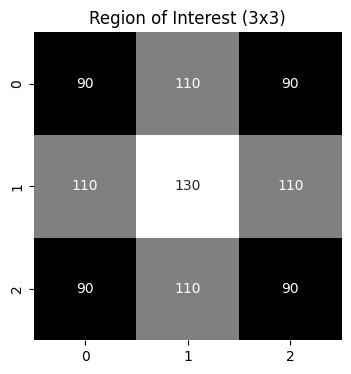

In [6]:
# Contoh detail konvolusi pada satu piksel (tengah matrix)
center_i, center_j = 3, 3
print(f"\nContoh Konvolusi pada Piksel Tengah [{center_i}, {center_j}]:")
print(f"Nilai Piksel Asli: {pixel_matrix[center_i, center_j]:.0f}")

# Ambil ROI 3x3 di sekitar piksel tengah
roi = pixel_matrix[center_i-1:center_i+2, center_j-1:center_j+2]
print(f"\nRegion of Interest (ROI) 3x3:")

# Visualisasi ROI
plt.figure(figsize=(4, 4))
sns.heatmap(roi, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Region of Interest (3x3)")
plt.show()


Konvolusi dengan Average Kernel:
ROI × Kernel:


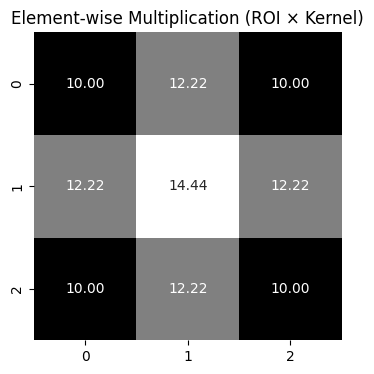

Sum (Hasil Konvolusi): 103.33


In [7]:
# Hitung konvolusi dengan Average Kernel
print(f"\nKonvolusi dengan Average Kernel:")
print("ROI × Kernel:")
element_wise = roi * average_kernel

# Visualisasi element-wise multiplication
plt.figure(figsize=(4, 4))
sns.heatmap(element_wise, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Element-wise Multiplication (ROI × Kernel)")
plt.show()

result = np.sum(element_wise)
print(f"Sum (Hasil Konvolusi): {result:.2f}")


Ukuran Matrix Pixel: 7x7
Ukuran Kernel: 3x3
Padding yang Dibutuhkan: Height=1, Width=1


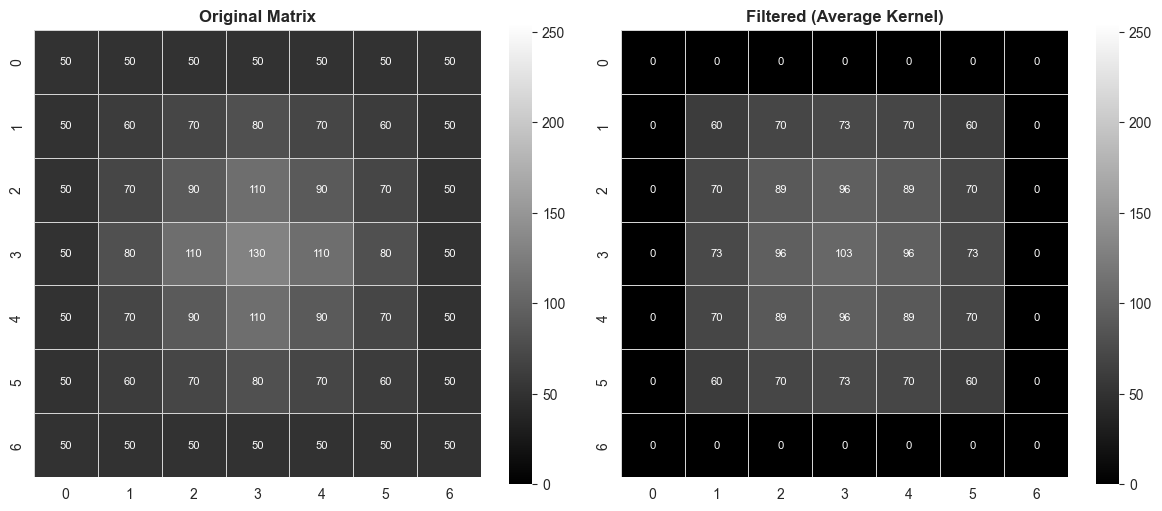

In [8]:
# Terapkan filter ke seluruh matrix pixel menggunakan konvolusi manual
img_height, img_width = pixel_matrix.shape
print(f"\nUkuran Matrix Pixel: {img_height}x{img_width}")
kernel_height, kernel_width = average_kernel.shape
print(f"Ukuran Kernel: {kernel_height}x{kernel_width}")

# Hitung padding yang dibutuhkan
pad_h = kernel_height // 2
pad_w = kernel_width // 2
print(f"Padding yang Dibutuhkan: Height={pad_h}, Width={pad_w}")

# Buat output matrix dengan ukuran yang sama dengan input
output = np.zeros_like(pixel_matrix)

# Lakukan konvolusi manual
for i in range(pad_h, img_height - pad_h):
    for j in range(pad_w, img_width - pad_w):
        # Ambil region of interest (ROI)
        roi = pixel_matrix[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
        
        # Element-wise multiplication dan sum
        output[i, j] = np.sum(roi * average_kernel)


# Original
# Create figure with seaborn style
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
sns.heatmap(pixel_matrix, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Filtered
sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [9]:
def manual_convolution(image, kernel):
    """
    Melakukan konvolusi manual antara image dan kernel
    """
    # Ukuran image dan kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Hitung padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Buat output matrix dengan ukuran yang sama dengan input
    output = np.zeros_like(image)
    
    # Lakukan konvolusi
    for i in range(pad_h, img_height - pad_h):
        for j in range(pad_w, img_width - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            
            # Element-wise multiplication dan sum
            output[i, j] = np.sum(roi * kernel)
    
    return output

def visualize_comparison(original, output):
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original
    sns.heatmap(original, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')

    # Filtered
    sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

#### Latihan

Buat matrix piksel 10x10 dengan nilai random antara 0-255, kemudian terapkan filter dengan matrix berikut ini:

```
Filter Kernel:
┌─                 ─┐
| 0.075 0.125 0.075 |
| 0.125 0.200 0.125 |
| 0.075 0.125 0.075 |
└─                 ─┘
```
Visualisasikan matrix original, matrix filter, dan matrix hasil filter menggunakan heatmap dari seaborn.

In [10]:
# Tulis kode di sini


#### Contoh Kernel Umum
| Nama Kernel       | Ukuran | Deskripsi                                      | Contoh Kernel                      |
|-------------------|--------|------------------------------------------------|-----------------------------------|
| Gaussian Blur    | 3x3    | Mengurangi noise dengan efek blur               | `[[1, 2, 1], [2, 4, 2], [1, 2,1]] / 16` |
| Average/Box Blur | 3x3    | Menghaluskan citra dengan rata-rata piksel tetangga | `[[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9` |
| Sharpening       | 3x3    | Meningkatkan tepi dan detail citra               | `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]` |
| Edge Detection   | 3x3    | Mendeteksi tepi dalam citra                     | `[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]` |
| Embossing        | 3x3    | Memberikan efek timbul pada citra                  | `[[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]` |
| Custom Kernel    | NxN    | Kernel yang dapat disesuaikan untuk efek khusus         | Variabel sesuai kebutuhan         |

**Visualisasi Kernel:**

```
Gaussian Blur:          Average/Box Blur:       Sharpening: 
┌─              ─┐        ┌─             ─┐         ┌─           ─┐
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
│ 2/16 4/16 2/16 │÷16     │ 1/9  1/9  1/9 │÷9       │ -1   5  -1  │
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
└─              ─┘        └─             ─┘         └─           ─┘
Edge Detection:         Embossing:
┌─           ─┐       ┌─            ─┐
│ -1  -1  -1  │       │  -2  -1   0  │
│ -1   8  -1  │       │  -1   1   1  │
│ -1  -1  -1  │       │   0   1   2  │
└─           ─┘       └─            ─┘
```

### 1. Smoothing Filters (Low-pass filters)
**Konsep:**
Smoothing filters digunakan untuk mengurangi noise dan detail halus dalam citra. Filter ini bekerja dengan menggantikan nilai piksel dengan rata-rata atau median dari piksel tetangganya, sehingga menghasilkan efek blur yang menghaluskan citra.

**Implementasi:**
```python
# Menggunakan Gaussian Blur sebagai contoh smoothing filter
blurred = cv2.GaussianBlur(img, (3, 3), 0)
show_image(blurred, "Gaussian Blurred Image")
```

**`GaussianBlur()`**
Fungsi ini menerapkan Gaussian Blur pada citra. Parameter pertama adalah citra input, parameter kedua adalah ukuran kernel (harus ganjil), dan parameter ketiga adalah standar deviasi Gaussian.

Parameter:
- `img`: Citra input yang akan di-blur.
- `(3, 3)`: Ukuran kernel Gaussian (3x3).
- `0`: Standar deviasi Gaussian. Jika 0, maka dihitung berdasarkan ukuran kernel.

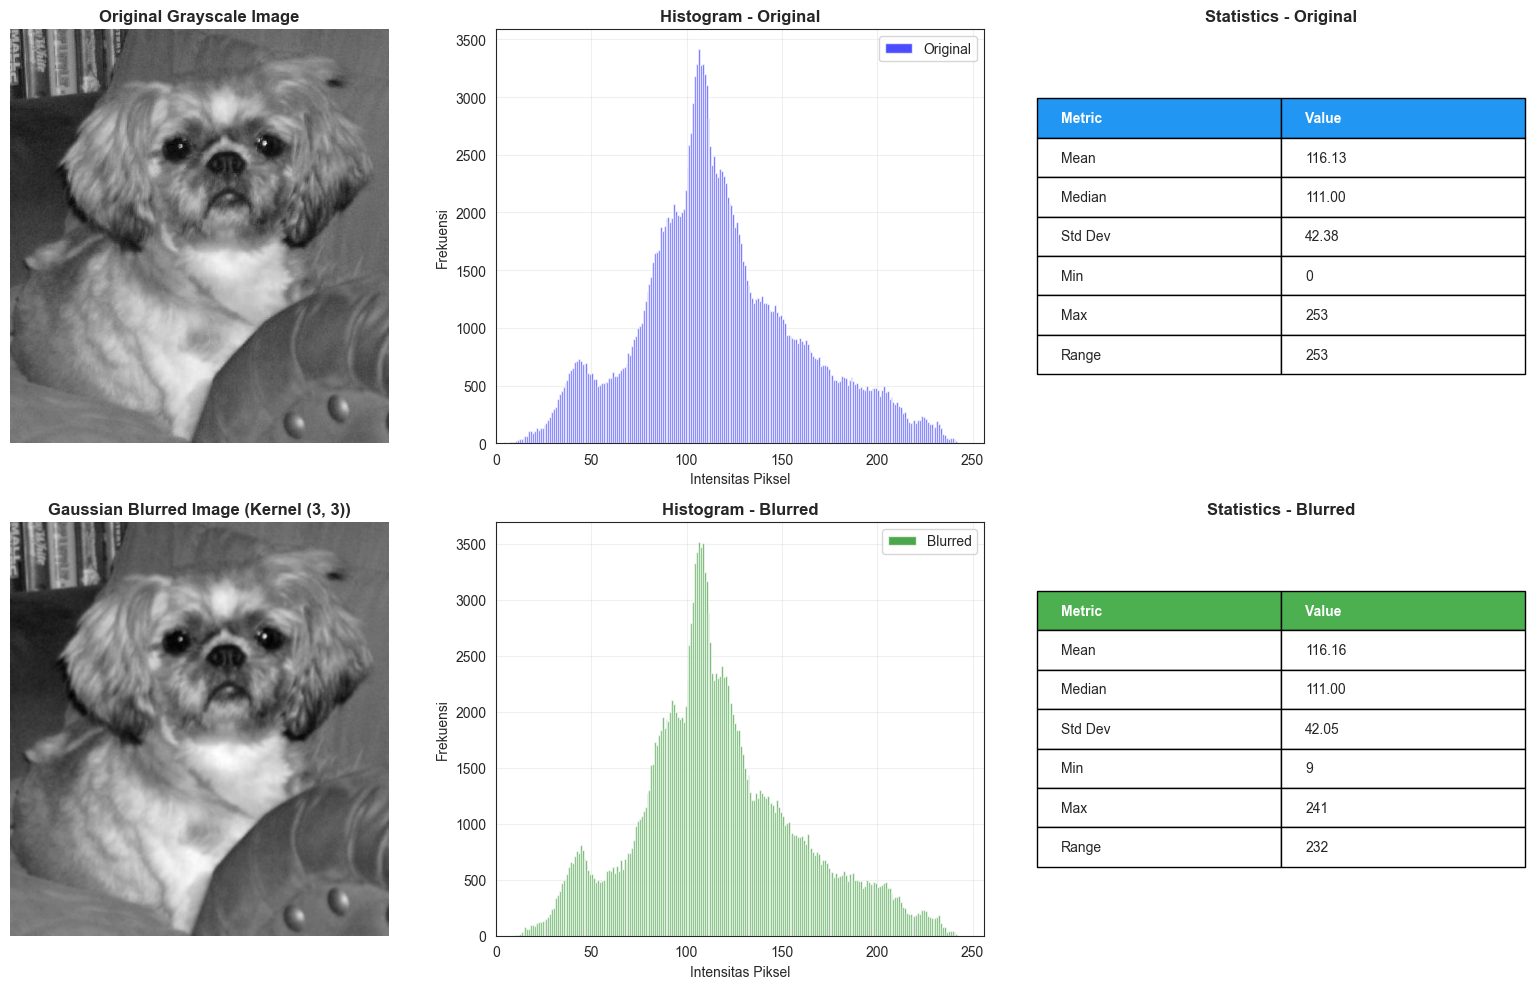

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_with_histogram(original, blurred, kernel_size=(3,3)):
    """Perbandingan original dan blurred dengan histogram"""
    fig = plt.figure(figsize=(16, 10))
    
    # Original Image
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Grayscale Image', fontweight='bold', fontsize=12)
    ax1.axis('off')
    
    # Original Histogram
    ax2 = plt.subplot(2, 3, 2)
    ax2.hist(original.ravel(), bins=256, range=[0, 256], 
             color='blue', alpha=0.7, label='Original')
    ax2.set_title('Histogram - Original', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Statistics Original
    ax3 = plt.subplot(2, 3, 3)
    ax3.axis('off')
    
    stats_original = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(original):.2f}'],
        ['Median', f'{np.median(original):.2f}'],
        ['Std Dev', f'{np.std(original):.2f}'],
        ['Min', f'{np.min(original)}'],
        ['Max', f'{np.max(original)}'],
        ['Range', f'{np.max(original) - np.min(original)}']
    ]
    
    table = ax3.table(cellText=stats_original, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#2196F3')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax3.set_title('Statistics - Original', fontweight='bold', fontsize=12)
    
    # Blurred Image
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(blurred, cmap='gray')
    ax4.set_title(f'Gaussian Blurred Image (Kernel {kernel_size})', 
                 fontweight='bold', fontsize=12)
    ax4.axis('off')
    
    # Blurred Histogram
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(blurred.ravel(), bins=256, range=[0, 256], 
             color='green', alpha=0.7, label='Blurred')
    ax5.set_title('Histogram - Blurred', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Intensitas Piksel')
    ax5.set_ylabel('Frekuensi')
    ax5.set_xlim([0, 256])
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    
    # Statistics Blurred
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    stats_blurred = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(blurred):.2f}'],
        ['Median', f'{np.median(blurred):.2f}'],
        ['Std Dev', f'{np.std(blurred):.2f}'],
        ['Min', f'{np.min(blurred)}'],
        ['Max', f'{np.max(blurred)}'],
        ['Range', f'{np.max(blurred) - np.min(blurred)}']
    ]
    
    table = ax6.table(cellText=stats_blurred, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Statistics - Blurred', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Gaussian Blur
blurred_image = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Tampilkan dengan histogram
compare_with_histogram(img_gray, blurred_image, kernel_size=(3,3))

# Analisis Histogram pada Gaussian Blur

## Apa Itu Gaussian Blur?

Gaussian Blur adalah teknik untuk menghaluskan atau "memblur" gambar dengan cara merata-ratakan nilai piksel dengan tetangganya menggunakan distribusi Gaussian (bell curve). Ini seperti membuat gambar jadi sedikit "kabur" atau "soft focus".

**Cara Kerjanya:**
Setiap piksel diganti dengan rata-rata tertimbang dari piksel di sekitarnya. Piksel yang lebih dekat punya bobot lebih besar, piksel yang lebih jauh bobotnya lebih kecil - mengikuti kurva Gaussian.

**Parameter:**
- **Kernel size** (misalnya 3x3, 5x5, 7x7): Semakin besar kernel, semakin blur hasilnya
- Kernel 3x3 = blur ringan
- Kernel 15x15 = blur berat

## Perubahan pada Histogram

**Histogram Jadi Lebih "Smooth" atau Halus**

Ini adalah perubahan paling mencolok pada histogram setelah Gaussian Blur:

**Histogram Original:**
- Bisa punya banyak "spike" atau lonjakan kecil
- Bentuknya "kasar" dengan naik-turun yang tajam
- Banyak variasi frekuensi antar bin yang berdekatan
- Terlihat "noisy" atau "jagged"

**Histogram Blurred:**
- Spike-spike kecil menghilang atau berkurang
- Bentuknya lebih "smooth" atau halus
- Transisi antar bin lebih gradual
- Terlihat lebih "clean" dengan kurva yang lebih mulus

**Kenapa Ini Terjadi?**

Karena blur merata-ratakan piksel dengan tetangganya:
- Piksel dengan nilai ekstrem (sangat gelap atau sangat terang dibanding tetangganya) akan "ditarik" ke nilai rata-rata
- Perbedaan tajam antar piksel berkurang
- Variasi lokal berkurang
- Hasilnya: histogram lebih smooth karena nilai-nilai piksel jadi lebih "clustered" atau mengelompok

## Perubahan pada Mean (Rata-rata)

**Mean Hampir Tidak Berubah**

Ini ciri khas dari Gaussian Blur:
```
Mean Original ≈ Mean Blurred
```

Contoh:
- Mean original: 125.34
- Mean blurred: 125.31
- Selisih: sangat kecil (< 1)

**Kenapa Mean Tetap?**

Karena Gaussian Blur cuma menggeser nilai antar piksel, tidak menambah atau mengurangi total intensitas gambar. Ini seperti mengaduk cat - warnanya jadi lebih merata, tapi total jumlah cat tidak berubah.

Ini berbeda dari:
- Brightness adjustment: mean berubah besar
- Gamma correction: mean berubah signifikan
- Binary threshold: mean bisa berubah drastis

## Perubahan pada Standard Deviation (Kontras)

**Standard Deviation Menurun**

Ini perubahan terpenting dari Gaussian Blur:
```
StdDev Blurred < StdDev Original
```

Contoh:
- StdDev original: 45.67
- StdDev blurred (3x3): 43.21
- StdDev blurred (7x7): 38.54
- StdDev blurred (15x15): 30.12

Semakin besar kernel, semakin turun standard deviation.

**Apa Artinya?**

Standard deviation mengukur "sebaran" atau variasi nilai piksel. Kalau StdDev turun, artinya:
- Nilai-nilai piksel jadi lebih mirip satu sama lain
- Perbedaan antara area gelap dan terang berkurang
- **Kontras berkurang**
- Detail halus berkurang

**Kenapa Ini Terjadi?**

Blur merata-ratakan perbedaan. Bayangkan:
- Piksel A = 50, tetangganya B = 150 (perbedaan = 100)
- Setelah blur: A jadi 80, B jadi 120 (perbedaan = 40)
- Perbedaan berkurang → variasi berkurang → StdDev turun

## Histogram: Penyempitan di Ujung

**Extreme Values Berkurang**

Perhatikan ujung-ujung histogram:

**Histogram Original:**
- Mungkin ada beberapa piksel di nilai 0-10 (hitam pekat)
- Mungkin ada beberapa piksel di nilai 245-255 (putih terang)

**Histogram Blurred:**
- Piksel di nilai 0-10 berkurang atau hilang
- Piksel di nilai 245-255 berkurang atau hilang
- Nilai-nilai ekstrem "ditarik" ke tengah

**Kenapa?**

Piksel ekstrem (sangat gelap atau sangat terang) biasanya dikelilingi piksel yang tidak se-ekstrem itu. Saat di-blur:
- Piksel hitam (0) yang tetangganya abu-abu (128) akan jadi abu gelap (50-70)
- Piksel putih (255) yang tetangganya abu-abu (128) akan jadi abu terang (180-200)

Hasilnya: histogram "menjauh" dari ujung-ujung dan lebih menumpuk di tengah.

## Bentuk Histogram: Lebih "Bell-Shaped"

**Histogram Condong ke Bentuk Gaussian**

Menariknya, setelah di-blur dengan Gaussian, histogram sering jadi lebih mendekati bentuk Gaussian (bell curve) juga:

**Sebelum Blur:**
- Histogram bisa berbentuk apapun - bimodal, skewed, flat, dll
- Banyak irregularities

**Setelah Blur:**
- Histogram lebih smooth dan lebih mendekati bell curve
- Lebih "normal distribution"

Ini bukan kebetulan - ini adalah efek dari Central Limit Theorem dalam statistik. Saat kita rata-ratakan banyak nilai random, hasilnya cenderung mendekati distribusi normal.

## Perbandingan Kernel Size

**Kernel Kecil (3x3) - Blur Ringan:**

Histogram:
- Masih mirip original
- Smoothing minimal
- StdDev turun sedikit (misalnya dari 45 jadi 43)
- Extreme values masih ada
- Detail masih cukup terjaga

**Kernel Sedang (7x7) - Blur Moderate:**

Histogram:
- Jelas lebih smooth
- Spike-spike kecil hilang
- StdDev turun lebih banyak (misalnya dari 45 jadi 38)
- Extreme values berkurang signifikan
- Detail mulai kabur

**Kernel Besar (15x15) - Blur Berat:**

Histogram:
- Sangat smooth, hampir seperti kurva halus
- Hampir tidak ada variasi kecil
- StdDev turun drastis (misalnya dari 45 jadi 28)
- Extreme values hampir hilang
- Detail sangat kabur

**Tren Umum:**

Semakin besar kernel → histogram semakin smooth → StdDev semakin kecil → kontras semakin berkurang

## Noise Reduction di Histogram

**Salah Satu Tujuan Utama Blur**

Noise dalam gambar terlihat di histogram sebagai:
- Spike-spike kecil yang random
- Variasi tinggi di frekuensi antar bin yang berdekatan
- "Jagged" atau bergerigi

Setelah blur:
- Spike-spike noise hilang
- Histogram jadi smooth
- Noise berkurang signifikan

Ini kenapa Gaussian Blur sering dipakai sebagai preprocessing untuk noise reduction.

## Trade-off: Smoothness vs Detail

**Yang Kita Dapat (Dari Histogram):**
- ✓ Histogram lebih smooth dan clean
- ✓ Noise berkurang
- ✓ Extreme values berkurang
- ✓ Distribusi lebih uniform

**Yang Kita Korbankan:**
- ✗ Standard deviation turun (kontras berkurang)
- ✗ Detail halus hilang
- ✗ Edge (tepi) jadi blur
- ✗ Ketajaman berkurang

Dari histogram, kita bisa lihat trade-off ini lewat:
- StdDev yang turun = kontras turun
- Histogram yang smooth = detail berkurang

ed) tapi gambarnya sudah terlalu blur. Histogram tidak bisa tell us apakah detail yang hilang itu penting atau tidak.

## Kesimpulan

Gaussian Blur menghasilkan perubahan histogram yang khas dan mudah dikenali:

**Karakteristik Histogram Blurred:**
- Lebih smooth dan halus (spike-spike hilang)
- Mean hampir tidak berubah
- Standard deviation turun (kontras berkurang)
- Extreme values berkurang
- Bentuk lebih mendekati bell curve
- Range masih sama tapi distribusi lebih menumpuk di tengah

**Trade-off:**
- ✓ Noise berkurang (histogram lebih clean)
- ✓ Distribusi lebih uniform
- ✓ Bagus untuk preprocessing
- ✗ Kontras berkurang (StdDev turun)
- ✗ Detail hilang
- ✗ Ketajaman berkurang

**Dari Histogram, Kita Bisa:**
- Menilai seberapa kuat blur-nya (dari seberapa smooth histogram)
- Melihat pengurangan kontras (dari StdDev)
- Mendeteksi noise reduction (dari hilangnya spike-spike)
- Memilih kernel size yang tepat

**Yang Tidak Bisa Dilihat dari Histogram:**
- Spatial distribution dari blur
- Apakah detail penting yang hilang
- Kualitas visual hasil blur

Histogram adalah tools yang bagus untuk analisis Gaussian Blur, tapi harus dikombinasi dengan inspeksi visual untuk hasil terbaik.

### 2. Sharpening Filters (High-pass filters)
**Konsep:**
Sharpening filters digunakan untuk meningkatkan tepi dan detail dalam citra. Filter ini bekerja dengan menonjolkan perbedaan antara piksel pusat dan tetangganya, sehingga membuat tepi lebih jelas.

**Implementasi:**
```python
# Menggunakan kernel sharpening sebagai contoh
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)
```

**`filter2D()`**
Fungsi ini menerapkan filter konvolusi pada citra menggunakan kernel yang ditentukan. Parameter pertama adalah citra input, parameter kedua adalah kedalaman output (-1 berarti sama dengan input), dan parameter ketiga adalah kernel filter.

Parameter:
- `img`: Citra input yang akan di-sharpen.
- `-1`: Kedalaman output (sama dengan input).
- `kernel`: Kernel sharpening yang digunakan untuk filter.

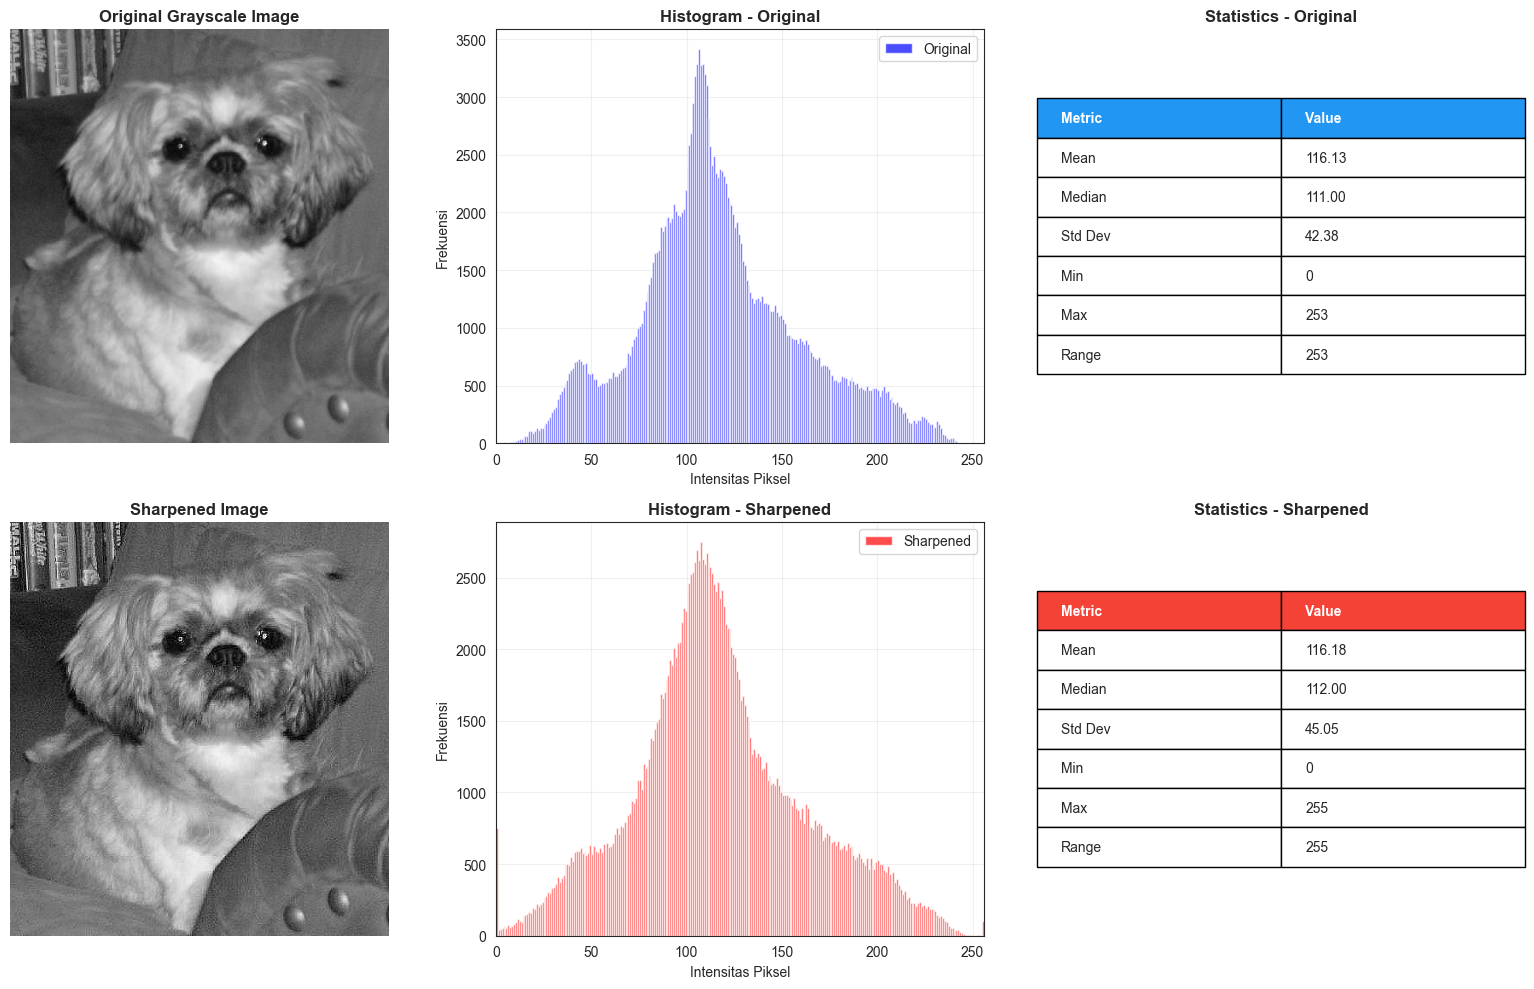

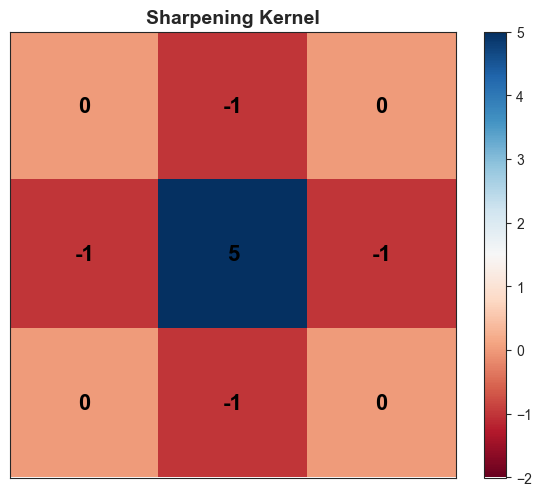

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_sharpening_with_histogram(original, sharpened, kernel):
    """Perbandingan original dan sharpened dengan histogram"""
    fig = plt.figure(figsize=(16, 10))
    
    # Original Image
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Grayscale Image', fontweight='bold', fontsize=12)
    ax1.axis('off')
    
    # Original Histogram
    ax2 = plt.subplot(2, 3, 2)
    ax2.hist(original.ravel(), bins=256, range=[0, 256], 
             color='blue', alpha=0.7, label='Original')
    ax2.set_title('Histogram - Original', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Statistics Original
    ax3 = plt.subplot(2, 3, 3)
    ax3.axis('off')
    
    stats_original = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(original):.2f}'],
        ['Median', f'{np.median(original):.2f}'],
        ['Std Dev', f'{np.std(original):.2f}'],
        ['Min', f'{np.min(original)}'],
        ['Max', f'{np.max(original)}'],
        ['Range', f'{np.max(original) - np.min(original)}']
    ]
    
    table = ax3.table(cellText=stats_original, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#2196F3')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax3.set_title('Statistics - Original', fontweight='bold', fontsize=12)
    
    # Sharpened Image
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(sharpened, cmap='gray')
    ax4.set_title('Sharpened Image', fontweight='bold', fontsize=12)
    ax4.axis('off')
    
    # Sharpened Histogram
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(sharpened.ravel(), bins=256, range=[0, 256], 
             color='red', alpha=0.7, label='Sharpened')
    ax5.set_title('Histogram - Sharpened', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Intensitas Piksel')
    ax5.set_ylabel('Frekuensi')
    ax5.set_xlim([0, 256])
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    
    # Statistics Sharpened
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    stats_sharpened = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(sharpened):.2f}'],
        ['Median', f'{np.median(sharpened):.2f}'],
        ['Std Dev', f'{np.std(sharpened):.2f}'],
        ['Min', f'{np.min(sharpened)}'],
        ['Max', f'{np.max(sharpened)}'],
        ['Range', f'{np.max(sharpened) - np.min(sharpened)}']
    ]
    
    table = ax6.table(cellText=stats_sharpened, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#F44336')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Statistics - Sharpened', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Kernel visualization
    fig3, ax = plt.subplots(1, 1, figsize=(6, 5))
    im = ax.imshow(kernel, cmap='RdBu', vmin=-2, vmax=5)
    ax.set_title('Sharpening Kernel', fontweight='bold', fontsize=14)
    
    # Add values to kernel cells
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            text = ax.text(j, i, kernel[i, j],
                          ha="center", va="center", color="black", 
                          fontsize=16, fontweight='bold')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

# Sharpening kernel
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])

sharpened_image = cv2.filter2D(img_gray, -1, kernel)

# Tampilkan dengan histogram
compare_sharpening_with_histogram(img_gray, sharpened_image, kernel)

# Analisis Histogram pada Image Sharpening

## Apa Itu Sharpening?

Sharpening adalah teknik untuk meningkatkan ketajaman gambar dengan cara memperkuat edge (tepi) dan detail halus. Ini adalah kebalikan dari blurring - kalau blur membuat gambar lebih halus, sharpening membuat gambar lebih tajam dan detail lebih menonjol.

**Cara Kerjanya:**
Sharpening menggunakan kernel konvolusi yang meningkatkan perbedaan antara piksel dengan tetangganya. Kernel yang umum dipakai:
```
[  0  -1   0 ]
[ -1   5  -1 ]
[  0  -1   0 ]
```

Angka tengah (5) adalah piksel target, angka -1 adalah tetangganya. Formula efektifnya:
```
Sharpened = Original + (Original - Blurred)
```

Atau bisa dilihat sebagai:
```
Sharpened = Original + Edge Enhancement
```

## Perubahan Drastis pada Histogram

**Histogram Jadi Lebih "Jagged" atau Bergerigi**

Ini adalah perubahan paling mencolok - berlawanan total dengan Gaussian Blur:

**Histogram Original:**
- Bentuk relatif smooth
- Transisi antar bin cukup halus
- Variasi moderate

**Histogram Sharpened:**
- Lebih "spiky" atau banyak lonjakan-lonjakan kecil
- Bentuk lebih "kasar" atau jagged
- Variasi tinggi antar bin yang berdekatan
- Terlihat lebih "noisy" secara visual

**Kenapa Ini Terjadi?**

Sharpening meningkatkan perbedaan lokal:
- Piksel yang lebih terang dari tetangganya jadi lebih terang lagi
- Piksel yang lebih gelap dari tetangganya jadi lebih gelap lagi
- Perbedaan kecil diperbesar
- Hasilnya: lebih banyak variasi nilai piksel → histogram lebih jagged

## Perubahan pada Mean (Rata-rata)

**Mean Hampir Tidak Berubah (Tapi Bisa Sedikit Bergeser)**
```
Mean Sharpened ≈ Mean Original
```

Contoh:
- Mean original: 125.34
- Mean sharpened: 125.67
- Selisih: sangat kecil

**Kenapa Mean Relatif Tetap?**

Kalau kita jumlahkan semua nilai di kernel sharpening:
```
0 + (-1) + 0 + (-1) + 5 + (-1) + 0 + (-1) + 0 = 1
```

Jumlahnya 1 (atau mendekati 1 tergantung kernel), yang artinya sharpening tidak menambah atau mengurangi total brightness secara signifikan. Dia cuma "redistribute" intensitas untuk meningkatkan kontras lokal.

Tapi beda dengan blur yang mean-nya benar-benar sama, sharpening bisa sedikit menggeser mean karena adanya clipping di ujung (piksel yang melebihi 255 atau kurang dari 0).

## Perubahan pada Standard Deviation (Kontras)

**Standard Deviation Meningkat**

Ini adalah perubahan terpenting dan paling signifikan:
```
StdDev Sharpened > StdDev Original
```

Contoh:
- StdDev original: 45.67
- StdDev sharpened (mild): 48.23
- StdDev sharpened (standard): 52.81
- StdDev sharpened (strong): 58.94

Semakin kuat sharpening, semakin tinggi standard deviation.

**Apa Artinya?**

Standard deviation yang naik berarti:
- Nilai-nilai piksel lebih tersebar
- Perbedaan antara area gelap dan terang meningkat
- **Kontras meningkat**
- Variasi lokal meningkat
- Detail lebih menonjol

**Kenapa Ini Terjadi?**

Sharpening memperbesar perbedaan lokal. Bayangkan:
- Piksel A = 100, tetangganya rata-rata 110
- Original perbedaan = 10
- Setelah sharpen: A jadi 95, tetangga jadi 115
- Perbedaan sekarang = 20

Perbedaan meningkat → variasi meningkat → StdDev naik

**Perbandingan dengan Operasi Lain:**

| Operasi | Efek pada StdDev |
|---------|------------------|
| Gaussian Blur | StdDev turun ↓ |
| **Sharpening** | **StdDev naik ↑** |
| Low Contrast | StdDev turun ↓ |
| High Contrast | StdDev naik ↑ |

Sharpening dan High Contrast sama-sama meningkatkan StdDev, tapi caranya berbeda:
- High Contrast: scale semua piksel dari mean
- Sharpening: enhance perbedaan lokal

## Histogram: Perluasan di Ujung (Edge Stretching)

**Extreme Values Bertambah**

Perhatikan ujung-ujung histogram:

**Histogram Original:**
- Sedikit atau tidak ada piksel di nilai 0-5
- Sedikit atau tidak ada piksel di nilai 250-255

**Histogram Sharpened:**
- Lebih banyak piksel di nilai 0-10 (hitam pekat)
- Lebih banyak piksel di nilai 245-255 (putih terang)
- Ada "spike" di nilai 0 dan 255 (tanda clipping)

**Kenapa?**

Sharpening memperbesar perbedaan, yang membuat:
- Piksel yang sudah agak gelap jadi lebih gelap lagi (bisa sampai 0)
- Piksel yang sudah agak terang jadi lebih terang lagi (bisa sampai 255)
- Edge yang tajam menghasilkan transisi ekstrem dari gelap ke terang

**Clipping Problem:**

Ini adalah masalah utama sharpening. Saat nilai piksel melebihi range:
- Nilai < 0 → di-clip jadi 0
- Nilai > 255 → di-clip jadi 255

Di histogram, ini terlihat sebagai spike tinggi di nilai 0 dan 255. Semakin banyak clipping, semakin banyak detail yang hilang.

## Bentuk Histogram: Lebih Lebar dan Irregular

**Histogram Spread Keluar**

**Sebelum Sharpening:**
- Histogram mungkin terpusat di range 50-200
- Bentuk relatif compact

**Setelah Sharpening:**
- Histogram melebar ke range 0-255
- Distribusi lebih spread out
- Tidak compact lagi

**Irregularity Meningkat:**

Histogram sharpened punya karakteristik:
- Banyak puncak-puncak kecil (multi-modal)
- Lembah dan puncak yang tidak teratur
- Tidak smooth seperti histogram original
- Terlihat lebih "chaotic"

Ini adalah trade-off: detail meningkat, tapi histogram jadi lebih irregular dan sulit diinterpretasi.

## Noise Amplification di Histogram

**Masalah Besar: Sharpening Juga Memperkuat Noise**

Kalau gambar original punya noise, sharpening akan memperkuat noise tersebut:

**Histogram Original dengan Noise:**
- Spike-spike kecil dari noise
- Relatif tersembunyi

**Histogram Sharpened:**
- Spike-spike noise jadi lebih besar
- Noise jadi lebih terlihat dan mengganggu
- Histogram jadi lebih jagged karena noise

**Kenapa?**

Sharpening tidak bisa membedakan antara:
- Detail yang kita inginkan (edge, texture)
- Noise yang kita tidak inginkan

Keduanya adalah "variasi lokal", jadi keduanya sama-sama diperkuat.

**Solusi:**

Sering kali gambar di-blur dulu (untuk kurangi noise), baru di-sharpen. Urutan:
1. Original → Gaussian Blur (kurangi noise)
2. Blurred → Sharpening (tambah detail)
3. Result: sharp tapi tidak terlalu noisy

## Overlay Histogram: Original vs Sharpened

Kalau kita overlay kedua histogram:

**Yang Terlihat:**

1. **Bentuk dasar mirip** - puncak masih di tempat yang sama
2. **Histogram sharpened lebih lebar** - spread ke ujung-ujung
3. **Histogram sharpened lebih irregular** - lebih banyak variasi kecil
4. **Spike di ujung** - clipping di 0 dan 255
5. **Area tengah lebih "kurus"** - piksel di midtones berkurang karena bergeser ke extreme

**Interpretasi:**

Sharpening "pull" distribusi dari tengah ke ujung-ujung, sambil meningkatkan variasi lokal. Ini kebalikan dari blur yang "push" dari ujung ke tengah dan mengurangi variasi.

## Perbandingan Intensitas Sharpening

**Mild Sharpening (Kernel Lembut):**

Kernel: `[[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]`

Histogram:
- Sedikit lebih jagged dari original
- StdDev naik sedikit
- Clipping minimal atau tidak ada
- Detail meningkat tapi natural

**Standard Sharpening (Kernel Medium):**

Kernel: `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]`

Histogram:
- Jelas lebih jagged
- StdDev naik signifikan
- Ada clipping tapi masih terkontrol
- Detail meningkat dengan jelas

**Strong Sharpening (Kernel Kuat):**

Kernel: `[[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]`

Histogram:
- Sangat jagged dan irregular
- StdDev naik drastis
- Banyak clipping (spike tinggi di 0 dan 255)
- Detail over-emphasized, terlihat tidak natural
- Noise sangat terlihat

**Tren Umum:**

Semakin kuat sharpening → StdDev semakin tinggi → histogram semakin jagged → clipping semakin banyak

## Clipping Detection dari Histogram

**Cara Mendeteksi Over-Sharpening:**

Lihat histogram di ujung-ujung:

**Histogram Sehat:**
- Spike di 0 dan 255 kecil atau tidak ada
- Distribusi smooth di ujung
- Tidak ada "wall" vertikal di 0 atau 255

**Histogram Over-Sharpened:**
- Spike tinggi di 0 (banyak piksel hitam pekat)
- Spike tinggi di 255 (banyak piksel putih terang)
- "Wall effect" - histogram seperti menabrak dinding di ujung

Kalau lebih dari 1-2% piksel ter-clipping, sharpening terlalu kuat.

**Rumus Sederhana:**
```
Clipping % = (Jumlah piksel di 0 + Jumlah piksel di 255) / Total piksel × 100
```

Idealnya < 1%

## Trade-off: Sharpness vs Naturalness

**Yang Kita Dapat (Dari Histogram):**
- ✓ StdDev naik (kontras meningkat)
- ✓ Detail lebih menonjol
- ✓ Edge lebih jelas
- ✓ Gambar lebih "crisp"

**Yang Kita Korbankan:**
- ✗ Noise ikut terperkuat (histogram lebih jagged)
- ✗ Clipping di ujung (spike di 0 dan 255)
- ✗ Hasil bisa terlihat tidak natural kalau terlalu kuat
- ✗ Histogram jadi lebih sulit dianalisis

Dari histogram, kita bisa monitor trade-off ini:
- StdDev naik = good (kontras meningkat)
- Spike di ujung = bad (clipping, kehilangan detail)
- Histogram terlalu jagged = warning (bisa over-sharpened atau noise tinggi)

## Kesimpulan

Sharpening menghasilkan perubahan histogram yang khas dan berlawanan dengan blur:

**Karakteristik Histogram Sharpened:**
- Lebih jagged dan irregular (banyak spike kecil)
- Mean hampir tidak berubah
- Standard deviation naik (kontras meningkat)
- Extreme values bertambah (spread ke ujung)
- Ada clipping di 0 dan 255 (spike di ujung)
- Bentuk lebih lebar dan irregular

**Trade-off:**
- ✓ Kontras meningkat (StdDev naik)
- ✓ Detail lebih jelas
- ✓ Edge lebih tajam
- ✗ Noise terperkuat (histogram jagged)
- ✗ Clipping (detail hilang di extreme)
- ✗ Bisa terlihat unnatural

**Dari Histogram, Kita Bisa:**
- Monitor seberapa kuat sharpening (dari StdDev)
- Deteksi over-sharpening (dari clipping)
- Menilai apakah noise jadi masalah (dari jaggedness)
- Memilih intensitas sharpening yang tepat

**Yang Tidak Bisa Dilihat dari Histogram:**
- Spatial distribution dari sharpening
- Halo effect
- Apakah hasilnya natural atau tidak
- Kualitas visual overall

Histogram adalah tools yang sangat berguna untuk monitor sharpening, terutama untuk deteksi over-sharpening lewat clipping. Tapi harus dikombinasi dengan inspeksi visual untuk hasil optimal.

### 3. Edge Detection Filters
**Konsep:**
Edge detection filters digunakan untuk mendeteksi tepi dalam citra dengan menyoroti perubahan tajam dalam intensitas piksel. Filter ini sering digunakan dalam analisis citra untuk mengenali objek.

**Implementasi:**
```python
# Menggunakan kernel edge detection sebagai contoh
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edges = cv2.filter2D(img, -1, kernel)
```	

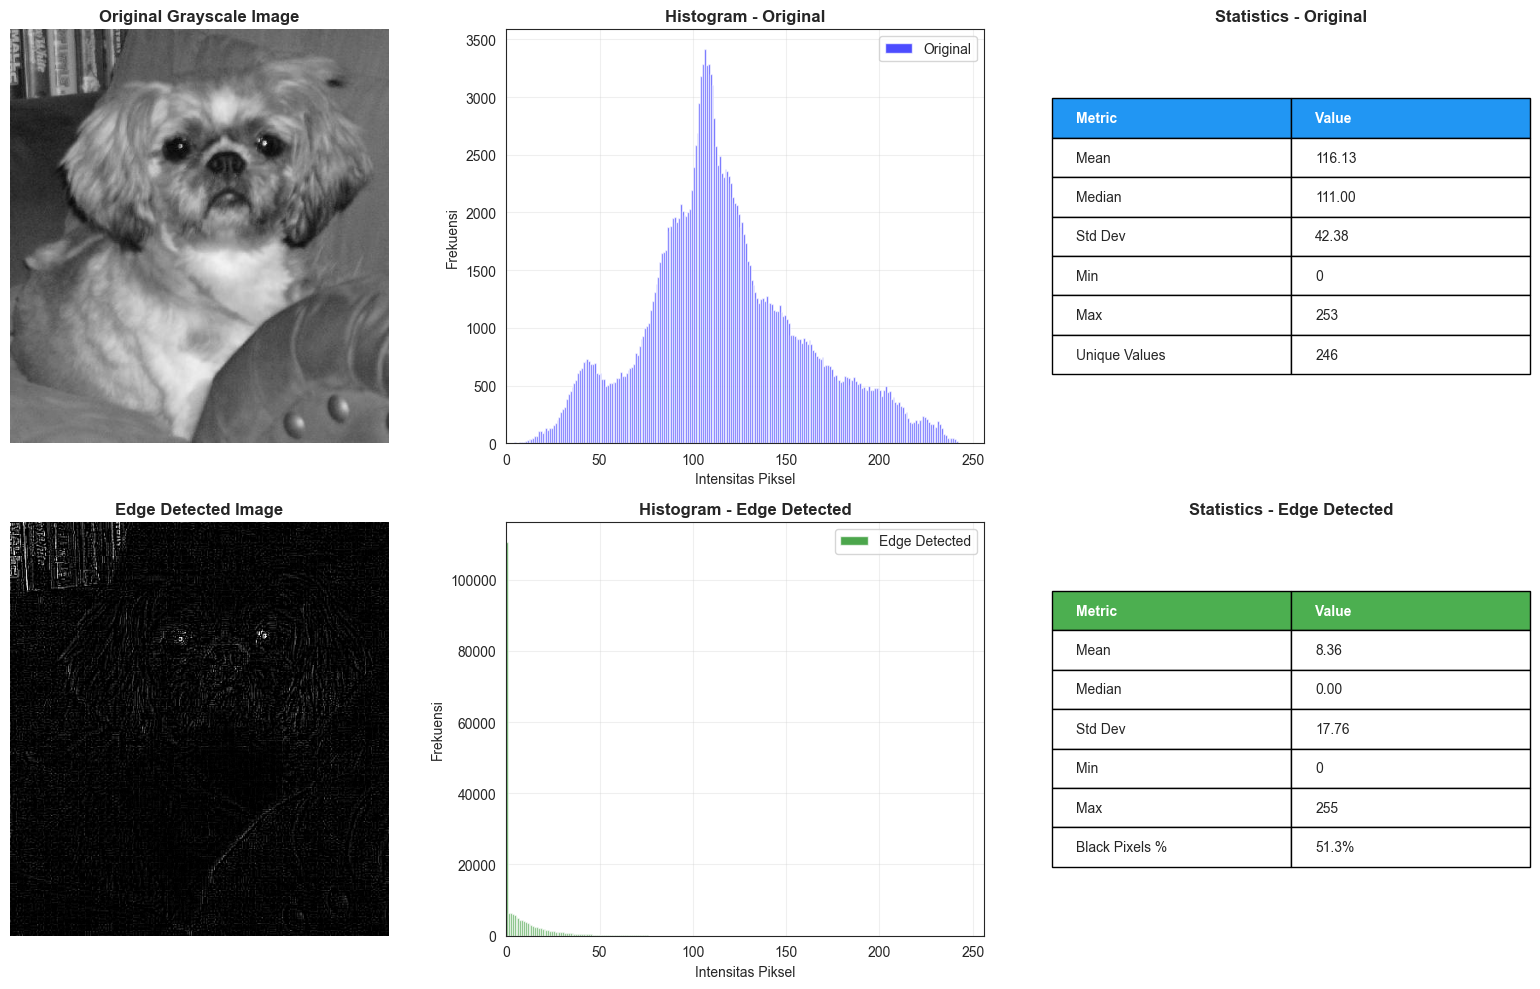

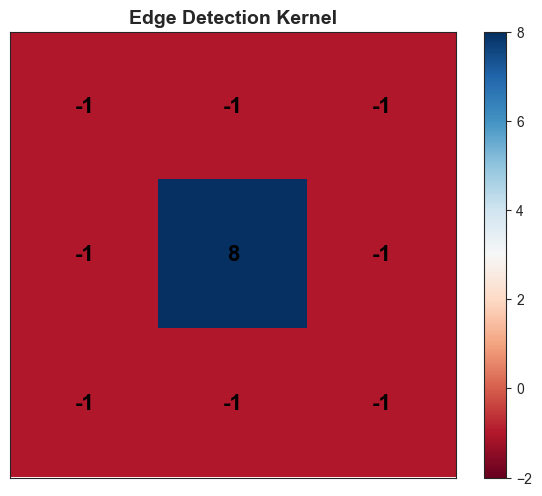

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_edge_detection_with_histogram(original, edge_detected, kernel):
    """Perbandingan original dan edge detected dengan histogram"""
    fig = plt.figure(figsize=(16, 10))
    
    # Original Image
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Grayscale Image', fontweight='bold', fontsize=12)
    ax1.axis('off')
    
    # Original Histogram
    ax2 = plt.subplot(2, 3, 2)
    ax2.hist(original.ravel(), bins=256, range=[0, 256], 
             color='blue', alpha=0.7, label='Original')
    ax2.set_title('Histogram - Original', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Statistics Original
    ax3 = plt.subplot(2, 3, 3)
    ax3.axis('off')
    
    stats_original = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(original):.2f}'],
        ['Median', f'{np.median(original):.2f}'],
        ['Std Dev', f'{np.std(original):.2f}'],
        ['Min', f'{np.min(original)}'],
        ['Max', f'{np.max(original)}'],
        ['Unique Values', f'{len(np.unique(original))}']
    ]
    
    table = ax3.table(cellText=stats_original, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#2196F3')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax3.set_title('Statistics - Original', fontweight='bold', fontsize=12)
    
    # Edge Detected Image
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(edge_detected, cmap='gray')
    ax4.set_title('Edge Detected Image', fontweight='bold', fontsize=12)
    ax4.axis('off')
    
    # Edge Detected Histogram
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(edge_detected.ravel(), bins=256, range=[0, 256], 
             color='green', alpha=0.7, label='Edge Detected')
    ax5.set_title('Histogram - Edge Detected', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Intensitas Piksel')
    ax5.set_ylabel('Frekuensi')
    ax5.set_xlim([0, 256])
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    
    # Statistics Edge Detected
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    black_pixels = np.sum(edge_detected == 0)
    white_pixels = np.sum(edge_detected == 255)
    total_pixels = edge_detected.size
    black_percent = (black_pixels / total_pixels) * 100
    
    stats_edge = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(edge_detected):.2f}'],
        ['Median', f'{np.median(edge_detected):.2f}'],
        ['Std Dev', f'{np.std(edge_detected):.2f}'],
        ['Min', f'{np.min(edge_detected)}'],
        ['Max', f'{np.max(edge_detected)}'],
        ['Black Pixels %', f'{black_percent:.1f}%']
    ]
    
    table = ax6.table(cellText=stats_edge, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Statistics - Edge Detected', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Kernel visualization
    fig3, ax = plt.subplots(1, 1, figsize=(6, 5))
    im = ax.imshow(kernel, cmap='RdBu', vmin=-2, vmax=8)
    ax.set_title('Edge Detection Kernel', fontweight='bold', fontsize=14)
    
    # Add values to kernel cells
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            text = ax.text(j, i, kernel[i, j],
                          ha="center", va="center", color="black", 
                          fontsize=16, fontweight='bold')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()


# Edge Detection kernel
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

# Tampilkan dengan histogram
compare_edge_detection_with_histogram(img_gray, edge_detected_image, kernel)

# Analisis Histogram pada Edge Detection

## Apa Itu Edge Detection?

Edge detection adalah teknik untuk mendeteksi dan menonjolkan tepi atau batas objek dalam gambar. Tepi adalah area dimana terjadi perubahan intensitas yang signifikan - misalnya batas antara objek dan background, atau batas antara dua objek berbeda.

**Cara Kerjanya:**

Edge detection menggunakan kernel konvolusi yang mengukur perbedaan intensitas dengan tetangga. Kernel Laplacian yang umum dipakai:
```
[ -1  -1  -1 ]
[ -1   8  -1 ]
[ -1  -1  -1 ]
```

Formula efektifnya:
```
Edge = 8 × Piksel_tengah - (Jumlah semua tetangga)
```

Kalau piksel tengah beda banget dari tetangganya → nilai tinggi (tepi terdeteksi)
Kalau piksel tengah mirip dengan tetangganya → nilai rendah atau nol (bukan tepi)

## Perubahan Dramatis pada Histogram

**Histogram Berubah Total - Didominasi Hitam**

Ini adalah perubahan paling ekstrem yang kita lihat sejauh ini:

**Histogram Original:**
- Distribusi relatif merata di berbagai intensitas
- Bentuk bisa bermacam-macam (normal, bimodal, dll)
- Piksel tersebar di range 0-255

**Histogram Edge Detected:**
- **DIDOMINASI oleh nilai 0 (hitam)**
- Spike raksasa di nilai 0 (bisa 70-90% dari total piksel!)
- Beberapa nilai tersebar di range 1-255 (tapi sangat sedikit)
- Hampir seperti histogram binary, tapi tidak persis

**Kenapa Ini Terjadi?**

Dalam gambar normal, SEBAGIAN BESAR area adalah area yang uniform atau smooth (tidak ada tepi):
- Langit yang polos
- Dinding yang rata
- Background yang solid

Area-area ini punya intensitas yang mirip dengan tetangganya, jadi saat di-edge detect hasilnya mendekati 0 (hitam).

Hanya area tepi yang punya perbedaan signifikan, dan ini cuma sebagian kecil dari gambar (mungkin 5-20% saja).

Hasilnya: mayoritas piksel jadi hitam, cuma sedikit yang terang.

## Analisis Spike Raksasa di Nilai 0

**Karakteristik Utama Histogram Edge Detection**
```
Piksel di nilai 0: 70-95% dari total piksel
```

Contoh:
- Total piksel: 1,000,000
- Piksel dengan nilai 0: 850,000 (85%)
- Piksel dengan nilai > 0: 150,000 (15%)

**Apa Artinya?**

Spike raksasa di 0 berarti:
- Sebagian besar gambar adalah area non-edge (uniform)
- Hanya sebagian kecil yang tepi
- Gambar hasil edge detection sangat "sparse" (jarang)

## Perubahan pada Mean (Rata-rata)

**Mean Turun Drastis**
```
Mean Original >> Mean Edge Detected
```

Contoh:
- Mean original: 125.34
- Mean edge detected: 15.67
- Penurunan: ~88%

**Kenapa Mean Turun Drastis?**

Karena mayoritas piksel jadi 0 (hitam):
```
Mean = Jumlah semua nilai piksel / Total piksel
```

Kalau 85% piksel = 0, mean pasti sangat rendah.

**Interpretasi:**

Mean yang sangat rendah menunjukkan:
- Gambar didominasi hitam
- Hanya sedikit informasi (edge) yang tersisa
- Gambar sangat "sparse"

Ini berbeda total dari semua operasi sebelumnya dimana mean relatif stabil.

## Perubahan pada Standard Deviation

**StdDev Bisa Naik atau Turun (Tergantung Gambar)**

Ini menarik - tidak seperti operasi lain yang prediktabel:

**Gambar dengan Banyak Tepi:**
- StdDev bisa naik
- Karena ada perbedaan besar antara area hitam (0) dan edge yang terang

**Gambar dengan Sedikit Tepi:**
- StdDev turun
- Karena mayoritas nilai jadi 0, variasi berkurang

**Contoh:**
- Original StdDev: 45.67
- Edge detected StdDev (gambar detail): 35.21 atau 52.34 (bervariasi)

**Yang Pasti:**

Distribusi nilai berubah total. Original mungkin punya nilai tersebar 0-255, edge detected punya mayoritas di 0 dengan beberapa nilai tersebar.

## Distribusi Piksel Non-Zero

**Yang Menarik: Piksel Selain 0**

Meskipun mayoritas piksel jadi 0, piksel yang bukan 0 (piksel edge) punya distribusi menarik:

**Pola Umum:**
- Banyak piksel di range 1-50 (edge lemah/halus)
- Beberapa piksel di range 50-150 (edge medium)
- Sedikit piksel di range 150-255 (edge kuat/tajam)

**Interpretasi:**

- **Edge lemah (1-50)**: Transisi gradual, perubahan halus
- **Edge medium (50-150)**: Transisi normal
- **Edge kuat (150-255)**: Transisi tajam, kontras tinggi

Histogram menunjukkan tidak semua edge sama - ada edge yang tajam dan ada yang halus.

## Clipping di Nilai 255

**Edge Kuat Ter-Clipping**

Seperti sharpening, edge detection juga bisa menghasilkan clipping:

**Kenapa Ada Clipping?**

Saat perbedaan intensitas sangat besar (misalnya hitam ke putih), nilai hasil edge detection bisa melebihi 255:
```
Edge value = 8 × 200 - (8 × 50) = 1600 - 400 = 1200
```

Nilai 1200 di-clip jadi 255.

**Di Histogram:**

Ada spike kecil di nilai 255 (jauh lebih kecil dari spike di 0).

Spike ini menunjukkan edge yang sangat tajam dan kontras tinggi.

## Persentase Area Edge vs Non-Edge

**Dari Histogram, Kita Bisa Hitung**
```
% Non-edge (hitam) = (Jumlah piksel dengan nilai 0) / Total × 100
% Edge = (Jumlah piksel dengan nilai > 0) / Total × 100
```

Contoh hasil:
- Non-edge: 85%
- Edge: 15%

**Interpretasi:**

Hanya 15% dari gambar adalah tepi. Sisanya 85% adalah area uniform yang tidak mengandung informasi edge.

**Variasi Antar Gambar:**

- Gambar sederhana (langit, dinding): Edge < 10%
- Gambar detail (tekstur, pattern): Edge 15-30%
- Gambar sangat kompleks (rumput, daun): Edge > 30%

Histogram menunjukkan kompleksitas gambar!

## Edge Strength Distribution

**Histogram Menunjukkan Kualitas Edge**

Dari distribusi piksel non-zero, kita bisa analisis:

**Histogram dengan Banyak Nilai Rendah (1-50):**
- Banyak edge lemah
- Gambar punya banyak gradasi halus
- Mungkin noise atau texture

**Histogram dengan Banyak Nilai Tinggi (150-255):**
- Banyak edge kuat
- Gambar punya transisi tajam
- Kontras tinggi antara objek

**Histogram Seimbang:**
- Mix antara edge lemah dan kuat
- Gambar punya variasi yang baik

## Perbandingan Metode Edge Detection

**Laplacian (Kernel yang Kita Pakai):**

Histogram:
- Spike sangat besar di 0 (85-90%)
- Deteksi semua edge (horizontal, vertical, diagonal)
- Sensitif ke noise

**Sobel (Directional):**

Histogram:
- Spike besar di 0 tapi sedikit lebih kecil (75-85%)
- Lebih banyak piksel non-zero
- Fokus pada edge di satu arah (X atau Y)

**Prewitt:**

Histogram:
- Similar dengan Sobel
- Spike di 0 sekitar 75-85%

**Canny (Advanced):**

Histogram:
- Spike di 0 paling besar (90-95%)
- Edge paling "clean" - lebih sedikit false positive
- Histogram paling sparse

## Noise Problem di Histogram

**Noise Terdeteksi Sebagai Edge**

Masalah besar edge detection:

**Gambar Original dengan Noise:**
- Noise adalah variasi kecil random
- Histogram original: spike kecil dari noise

**Setelah Edge Detection:**
- Noise terdeteksi sebagai "edge"
- Histogram: lebih banyak piksel non-zero (tapi kebanyakan adalah noise, bukan edge real)

**Solusi:**

Blur dulu sebelum edge detection:
1. Original → Gaussian Blur (kurangi noise)
2. Blurred → Edge Detection (deteksi edge tanpa noise)

Histogram akan menunjukkan:
- Tanpa blur: banyak piksel 1-30 (noise)
- Dengan blur: lebih sedikit piksel 1-30, lebih fokus ke nilai tinggi (edge real)

## Aplikasi Praktis dari Analisis Histogram

**1. Menilai Kompleksitas Gambar**

Dari persentase piksel non-zero:
- < 10%: Gambar sederhana
- 10-20%: Gambar normal
- > 20%: Gambar kompleks

**2. Deteksi Over-Detection**

Kalau piksel non-zero terlalu banyak (>30%):
- Mungkin threshold terlalu rendah
- Mungkin terlalu banyak noise terdeteksi
- Perlu preprocessing (blur) atau parameter tuning

**3. Kualitas Edge**

Dari distribusi nilai non-zero:
- Banyak di range tinggi (>100): Edge berkualitas, kontras tinggi
- Banyak di range rendah (<50): Mungkin noise atau edge lemah

**4. Memilih Threshold untuk Binary Edge**

Histogram menunjukkan distribusi nilai edge. Kita bisa pilih threshold untuk convert ke binary:
- Threshold rendah (20): Ambil semua edge termasuk yang lemah
- Threshold tinggi (100): Ambil hanya edge yang kuat

## Kesimpulan

Edge detection menghasilkan perubahan histogram yang paling ekstrem dari semua operasi yang kita pelajari:

**Karakteristik Histogram Edge Detection:**
- Spike raksasa di nilai 0 (70-95% piksel)
- L-shape yang sangat jelas
- Mean turun drastis (bisa 80-90%)
- StdDev bervariasi tergantung gambar
- Hanya sedikit piksel tersebar di nilai 1-255
- Mungkin spike kecil di 255 (edge sangat kuat)

**Interpretasi Histogram:**
- Spike besar di 0 = banyak area non-edge (normal)
- % piksel non-zero = kompleksitas gambar
- Distribusi piksel non-zero = kualitas dan kekuatan edge
- Spike di 255 = ada edge yang sangat tajam/kontras

**Dari Histogram, Kita Bisa:**
- Menilai kompleksitas gambar (dari % edge)
- Mendeteksi noise problem (dari banyaknya nilai rendah)
- Memilih threshold untuk binary edge
- Membandingkan efektivitas metode edge detection

**Yang Tidak Bisa Dilihat:**
- Spatial distribution edge
- Konektivitas edge
- Apakah edge membentuk shape yang meaningful
- Kualitas visual hasil

**Kesimpulan Akhir:**

Edge detection adalah operasi ekstraksi, bukan transformasi. Histogram menunjukkan ini dengan jelas: mayoritas informasi dibuang (spike di 0), hanya informasi edge yang disimpan (piksel non-zero). Ini membuat histogram edge detection sangat berbeda dan mudah dikenali dibanding operasi lain.

### 4. Embossing Filters
**Konsep:**
Embossing filters memberikan efek timbul pada citra dengan menyoroti tepi dan memberikan bayangan. Filter ini menciptakan ilusi kedalaman dengan mengubah intensitas piksel berdasarkan tetangganya.

**Implementasi:**
```python
# Menggunakan kernel embossing sebagai contoh
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
embossed = cv2.filter2D(img, -1, kernel)
```

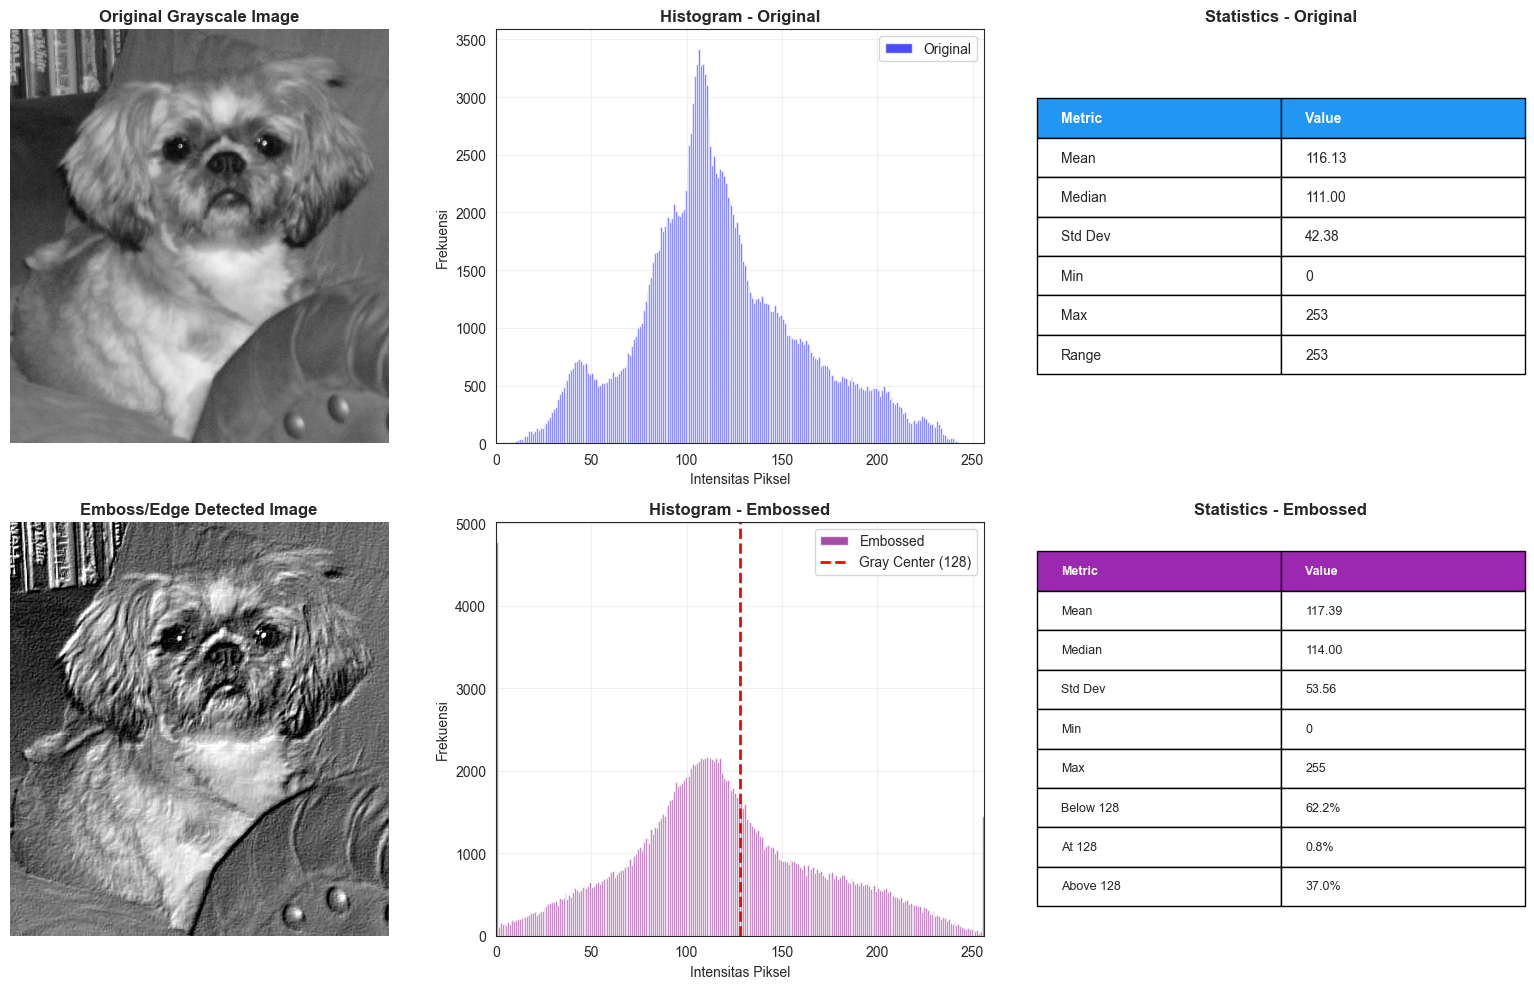

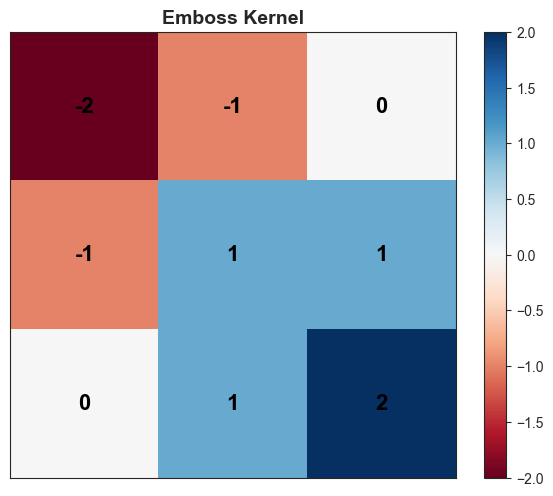

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_emboss_with_histogram(original, embossed, kernel):
    """Perbandingan original dan emboss dengan histogram"""
    fig = plt.figure(figsize=(16, 10))
    
    # Original Image
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Grayscale Image', fontweight='bold', fontsize=12)
    ax1.axis('off')
    
    # Original Histogram
    ax2 = plt.subplot(2, 3, 2)
    ax2.hist(original.ravel(), bins=256, range=[0, 256], 
             color='blue', alpha=0.7, label='Original')
    ax2.set_title('Histogram - Original', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Statistics Original
    ax3 = plt.subplot(2, 3, 3)
    ax3.axis('off')
    
    stats_original = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(original):.2f}'],
        ['Median', f'{np.median(original):.2f}'],
        ['Std Dev', f'{np.std(original):.2f}'],
        ['Min', f'{np.min(original)}'],
        ['Max', f'{np.max(original)}'],
        ['Range', f'{np.max(original) - np.min(original)}']
    ]
    
    table = ax3.table(cellText=stats_original, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#2196F3')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax3.set_title('Statistics - Original', fontweight='bold', fontsize=12)
    
    # Embossed Image
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(embossed, cmap='gray')
    ax4.set_title('Emboss/Edge Detected Image', fontweight='bold', fontsize=12)
    ax4.axis('off')
    
    # Embossed Histogram
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(embossed.ravel(), bins=256, range=[0, 256], 
             color='purple', alpha=0.7, label='Embossed')
    
    # Mark the center (128)
    ax5.axvline(128, color='red', linestyle='--', linewidth=2, 
                label='Gray Center (128)')
    
    ax5.set_title('Histogram - Embossed', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Intensitas Piksel')
    ax5.set_ylabel('Frekuensi')
    ax5.set_xlim([0, 256])
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    
    # Statistics Embossed
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    below_128 = np.sum(embossed < 128)
    at_128 = np.sum(embossed == 128)
    above_128 = np.sum(embossed > 128)
    total = embossed.size
    
    stats_embossed = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(embossed):.2f}'],
        ['Median', f'{np.median(embossed):.2f}'],
        ['Std Dev', f'{np.std(embossed):.2f}'],
        ['Min', f'{np.min(embossed)}'],
        ['Max', f'{np.max(embossed)}'],
        ['Below 128', f'{(below_128/total*100):.1f}%'],
        ['At 128', f'{(at_128/total*100):.1f}%'],
        ['Above 128', f'{(above_128/total*100):.1f}%']
    ]
    
    table = ax6.table(cellText=stats_embossed, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#9C27B0')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Statistics - Embossed', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    
    # Kernel visualization
    fig3, ax = plt.subplots(1, 1, figsize=(6, 5))
    im = ax.imshow(kernel, cmap='RdBu', vmin=-2, vmax=2)
    ax.set_title('Emboss Kernel', fontweight='bold', fontsize=14)
    
    # Add values to kernel cells
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            text = ax.text(j, i, kernel[i, j],
                          ha="center", va="center", color="black", 
                          fontsize=16, fontweight='bold')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

# Emboss kernel
kernel = np.array([[-2, -1, 0], 
                   [-1,  1, 1], 
                   [ 0,  1, 2]])

edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

# Tampilkan dengan histogram
compare_emboss_with_histogram(img_gray, edge_detected_image, kernel)

# Analisis Histogram pada Emboss Effect

## Apa Itu Emboss Effect?

Emboss (relief atau timbul) adalah teknik yang membuat gambar terlihat seperti ukiran 3D atau relief pada permukaan. Efeknya seperti melihat gambar yang ditekan pada logam atau clay - ada area yang "menonjol" (terang) dan area yang "masuk" (gelap).

**Cara Kerjanya:**

Emboss adalah edge detection directional yang dikombinasi dengan offset ke gray center (128). Kernel yang kita pakai:
```
[ -2  -1   0 ]
[ -1   1   1 ]
[  0   1   2 ]
```

**Konsep Kunci:**

Kernel ini mendeteksi edge dengan arah tertentu (diagonal top-left ke bottom-right). Hasilnya:
- Area dengan edge → terang (>128) atau gelap (<128) tergantung arah transisi
- Area tanpa edge → abu-abu tengah (~128)

Ini berbeda dari edge detection biasa yang:
- Area dengan edge → terang
- Area tanpa edge → hitam (0)

## Perubahan Unik pada Histogram

**Histogram Centered di 128 (Gray Center)**

Ini adalah ciri khas paling unik dari emboss effect:

**Histogram Original:**
- Distribusi bisa dimana saja (tergantung brightness gambar)
- Mean bisa 80, 120, 150, dll

**Histogram Embossed:**
- **Distribusi terpusat di sekitar 128**
- Mean sangat mendekati 128 (misalnya 125-131)
- Seperti bell curve tapi centered di tengah range

**Kenapa Ini Terjadi?**

Emboss kernel dirancang supaya:
```
Jumlah kernel = -2 + (-1) + 0 + (-1) + 1 + 1 + 0 + 1 + 2 = 1
```

Tapi yang lebih penting, kernel ini mengukur perbedaan arah. Kalau tidak ada perbedaan (area uniform), hasilnya mendekati nilai tengah yang kemudian di-offset ke 128.

**Offset ke 128:**

Sebenarnya kernel menghasilkan nilai bisa negatif atau positif. OpenCV secara otomatis menambah offset supaya:
- Negatif → 0-127 (area "masuk" atau shadow)
- Zero → 128 (area netral)
- Positif → 129-255 (area "menonjol" atau highlight)

## Mean Mendekati 128

**Mean Sangat Stabil**
```
Mean Embossed ≈ 128
```

Contoh:
- Mean original: 145.23
- Mean embossed: 127.84
- Difference: Embossed selalu dekat 128

**Kenapa Mean = 128?**

Ini adalah properti matematis dari kernel emboss:
1. Kernel mengukur perbedaan directional
2. Untuk setiap edge yang positif (terang), ada edge berlawanan yang negatif (gelap)
3. Rata-ratanya balance di tengah
4. Plus offset yang membuat center = 128


## Distribusi Simetris di Sekitar 128

**Histogram Berbentuk Bell Curve Centered**

**Karakteristik:**

1. **Puncak di 128**: Mayoritas piksel di area netral (tidak ada edge kuat)
2. **Spread simetris**: Distribusi relatif seimbang ke kiri dan kanan dari 128
3. **Decay gradual**: Makin jauh dari 128, makin sedikit pikselnya

**Interpretasi:**

- **Area center (120-136)**: Mayoritas piksel - area tanpa edge signifikan
- **Area dark (0-119)**: Edge dengan transisi dark-to-light (shadow side)
- **Area light (137-255)**: Edge dengan transisi light-to-dark (highlight side)

## Three Zones: Shadow, Neutral, Highlight

**Histogram Bisa Dibagi 3 Zona**

**Zone 1: Shadow (0-127)**
- Piksel lebih gelap dari gray center
- Menunjukkan area yang "masuk" atau tertekan
- Edge dimana intensity turun ke arah kernel

**Zone 2: Neutral Gray (128)**
- Spike atau puncak di 128
- Area tanpa edge atau area uniform
- Mayoritas gambar biasanya di sini (40-60%)

**Zone 3: Highlight (129-255)**
- Piksel lebih terang dari gray center
- Menunjukkan area yang "menonjol" atau raised
- Edge dimana intensity naik ke arah kernel

**Proporsi Ideal:**

Emboss yang baik biasanya punya distribusi relatif seimbang:
- Shadow: 20-30%
- Neutral: 40-60%
- Highlight: 20-30%

Kalau terlalu condong ke satu sisi, effect kurang jelas.

## Standard Deviation dan Kontras

**StdDev Lebih Rendah dari Original**
```
StdDev Embossed < StdDev Original
```

Contoh:
- StdDev original: 45.67
- StdDev embossed: 28.34
- Reduction: ~38%

**Kenapa StdDev Turun?**

Karena emboss "flatten" informasi:
1. Area uniform jadi gray (128)
2. Hanya edge yang punya variasi
3. Overall variasi berkurang karena banyak yang jadi neutral gray

**Tapi Kontras Perseptual Meningkat!**

Ini paradoks menarik:
- StdDev turun (kontras statistik turun)
- Tapi gambar terlihat lebih "contrasty" karena edge effect

Ini karena mata manusia lebih sensitif terhadap edge daripada area uniform.

## Directional Nature dari Histogram

**Arah Kernel Mempengaruhi Distribusi**

Kernel kita mendeteksi edge diagonal (top-left to bottom-right). Ini membuat:

**Light-to-Dark Transition:**
- Hasil: Nilai rendah (<128)
- Di histogram: Kontribusi ke zone shadow

**Dark-to-Light Transition:**
- Hasil: Nilai tinggi (>128)
- Di histogram: Kontribusi ke zone highlight

**Kalau Ganti Arah Kernel:**

Kernel rotated 180° akan menghasilkan:
- Histogram terbalik (mirror terhadap 128)
- Yang tadinya shadow jadi highlight
- Yang tadinya highlight jadi shadow

Tapi bentuk dasar tetap sama - centered di 128 dengan spread simetris.

## Spike di 128: Flat Area Indicator

**Tinggi Spike di 128 Menunjukkan Sesuatu**

**Spike Tinggi di 128:**
- Banyak area tanpa edge signifikan
- Gambar punya area uniform yang luas (langit, dinding, background)
- Emboss effect mungkin subtle

**Spike Pendek di 128:**
- Sedikit area uniform
- Gambar detail dengan banyak edge
- Emboss effect lebih dramatis

**Contoh:**
- Foto landscape dengan langit luas → spike tinggi di 128
- Foto texture atau pattern detail → spike pendek, distribusi lebih spread

## Clipping di Ujung

**Clipping Bisa Terjadi Tapi Minimal**

**Histogram Embossed Jarang Nyentuh 0 dan 255**

Berbeda dengan:
- Edge detection: Banyak piksel di 0, sedikit di 255
- Sharpening: Bisa banyak clipping di kedua ujung

Emboss:
- Sangat sedikit piksel di 0 (karena ada offset ke 128)
- Sangat sedikit piksel di 255 (karena edge jarang ekstrem)
- Decay smooth ke ujung-ujung

**Kalau Ada Clipping:**

Spike kecil di 0 atau 255 menunjukkan:
- Edge yang sangat tajam dan kontras tinggi
- Transisi ekstrem dari hitam ke putih
- Mungkin perlu tuning kernel atau preprocessing

## Noise di Histogram Embossed

**Noise Terlihat Berbeda**

**Gambar Noisy:**

Histogram embossed akan:
- Lebih jagged di sekitar 128
- Spread lebih lebar (StdDev lebih tinggi)
- Spike di 128 lebih pendek

**Gambar Clean:**

Histogram:
- Smooth bell curve
- Spread moderate
- Spike di 128 jelas dan tinggi

**Solusi:**

Blur sebelum emboss untuk hasil lebih smooth:
1. Original → Gaussian Blur
2. Blurred → Emboss
3. Result: Clean emboss tanpa noise

Histogram akan lebih smooth dan spike di 128 lebih pronounced.

## Kekuatan Emboss dari Histogram

**Dari Spread Histogram:**

**Narrow Spread (StdDev kecil):**
- Histogram clustered tight di sekitar 128
- Emboss effect subtle
- Gambar terlihat flat dengan relief minimal

**Wide Spread (StdDev besar):**
- Histogram spread lebar 50-200
- Emboss effect kuat
- Relief dramatis, 3D effect jelas

**Tuning Emboss:**

Untuk strengthen emboss:
1. Multiply hasil dengan konstanta >1
2. Histogram akan spread lebih lebar
3. StdDev naik
4. Tapi hati-hati clipping!

## Kesimpulan

Emboss effect menghasilkan histogram yang sangat khas dan mudah dikenali:

**Karakteristik Histogram Embossed:**
- Terpusat di 128 (gray center) - ciri paling unik
- Bentuk bell curve yang relatif simetris
- Mean selalu ~128 (sangat konsisten)
- StdDev lebih rendah dari original
- Spread moderate (tidak ekstrem ke ujung)
- Spike di 128 untuk area uniform
- Distribusi shadow dan highlight relatif seimbang

**Three Zones:**
- Shadow (0-127): 20-30% - area "masuk"
- Neutral (128): 40-60% - area tanpa edge
- Highlight (129-255): 20-30% - area "menonjol"

**Dari Histogram, Kita Bisa:**
- Verify emboss centered di 128 (quality check)
- Assess effect strength (dari spread/StdDev)
- Check balance (shadow vs highlight proportion)
- Detect noise (dari jaggedness)
- Compare different emboss kernels

**Perbedaan dari Edge Detection:**
- Edge: L-shape, dominated by 0
- Emboss: Bell curve, centered at 128
- Edge: Binary information
- Emboss: Directional information

**Kesimpulan Akhir:**

Emboss adalah operasi unique yang menghasilkan histogram sangat distinctive. Mean yang selalu ~128 dan bentuk bell curve centered adalah signature yang tidak dimiliki operasi lain. Histogram embossed memberikan informasi tentang kekuatan effect, balance, dan quality - making it a useful diagnostic tool.

### 5. Custom Convolution Filters
**Konsep:**
Custom convolution filters memungkinkan pengguna untuk membuat kernel mereka sendiri sesuai dengan kebutuhan spesifik. Ini memberikan fleksibilitas dalam menerapkan berbagai efek pada citra.
**Implementasi:**
```python
# Membuat kernel custom sebagai contoh
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img, -1, custom_kernel)
```

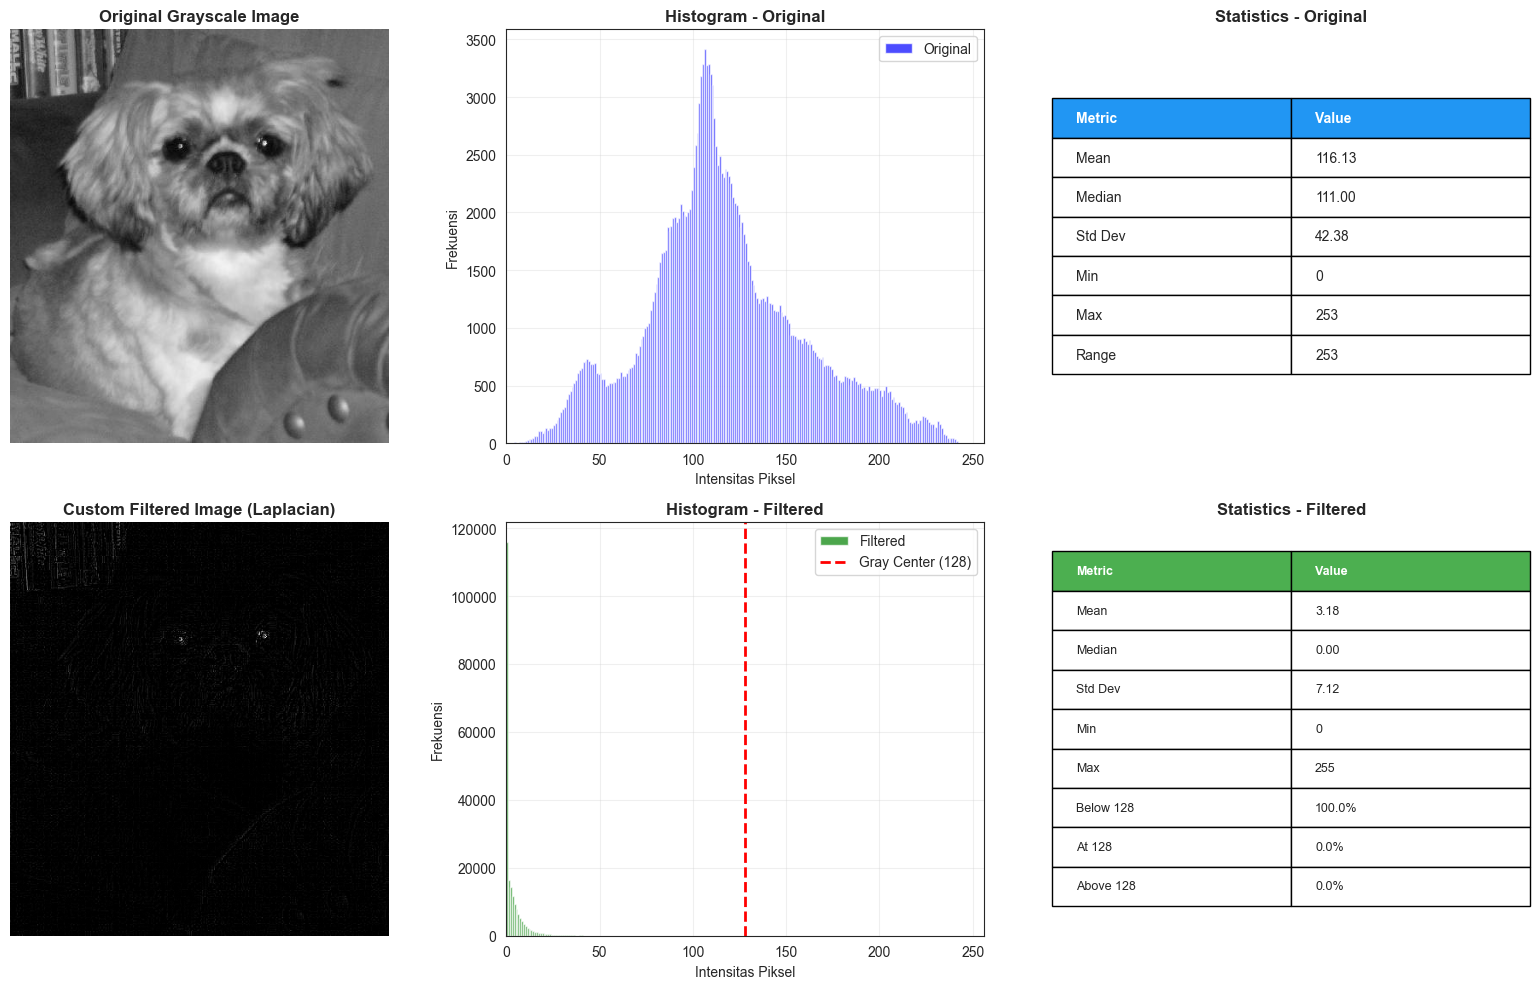

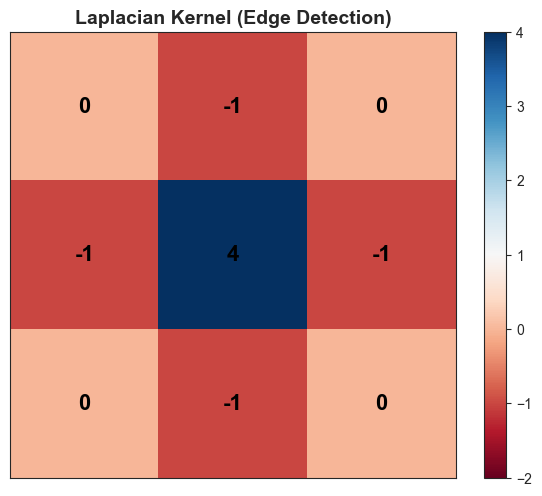

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_filtered_with_histogram(original, filtered, kernel):
    """Perbandingan original dan filtered dengan histogram"""
    fig = plt.figure(figsize=(16, 10))
    
    # Original Image
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Grayscale Image', fontweight='bold', fontsize=12)
    ax1.axis('off')
    
    # Original Histogram
    ax2 = plt.subplot(2, 3, 2)
    ax2.hist(original.ravel(), bins=256, range=[0, 256], 
             color='blue', alpha=0.7, label='Original')
    ax2.set_title('Histogram - Original', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Statistics Original
    ax3 = plt.subplot(2, 3, 3)
    ax3.axis('off')
    
    stats_original = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(original):.2f}'],
        ['Median', f'{np.median(original):.2f}'],
        ['Std Dev', f'{np.std(original):.2f}'],
        ['Min', f'{np.min(original)}'],
        ['Max', f'{np.max(original)}'],
        ['Range', f'{np.max(original) - np.min(original)}']
    ]
    
    table = ax3.table(cellText=stats_original, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#2196F3')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax3.set_title('Statistics - Original', fontweight='bold', fontsize=12)
    
    # Filtered Image
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(filtered, cmap='gray')
    ax4.set_title('Custom Filtered Image (Laplacian)', fontweight='bold', fontsize=12)
    ax4.axis('off')
    
    # Filtered Histogram
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(filtered.ravel(), bins=256, range=[0, 256], 
             color='green', alpha=0.7, label='Filtered')
    
    # Mark the center (128)
    ax5.axvline(128, color='red', linestyle='--', linewidth=2, 
                label='Gray Center (128)')
    
    ax5.set_title('Histogram - Filtered', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Intensitas Piksel')
    ax5.set_ylabel('Frekuensi')
    ax5.set_xlim([0, 256])
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    
    # Statistics Filtered
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    below_128 = np.sum(filtered < 128)
    at_128 = np.sum(filtered == 128)
    above_128 = np.sum(filtered > 128)
    total = filtered.size
    
    stats_filtered = [
        ['Metric', 'Value'],
        ['Mean', f'{np.mean(filtered):.2f}'],
        ['Median', f'{np.median(filtered):.2f}'],
        ['Std Dev', f'{np.std(filtered):.2f}'],
        ['Min', f'{np.min(filtered)}'],
        ['Max', f'{np.max(filtered)}'],
        ['Below 128', f'{(below_128/total*100):.1f}%'],
        ['At 128', f'{(at_128/total*100):.1f}%'],
        ['Above 128', f'{(above_128/total*100):.1f}%']
    ]
    
    table = ax6.table(cellText=stats_filtered, loc='center',
                     cellLoc='left', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    for i in range(2):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Statistics - Filtered', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    
    # Kernel visualization
    fig3, ax = plt.subplots(1, 1, figsize=(6, 5))
    im = ax.imshow(kernel, cmap='RdBu', vmin=-2, vmax=4)
    ax.set_title('Laplacian Kernel (Edge Detection)', fontweight='bold', fontsize=14)
    
    # Add values to kernel cells
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            text = ax.text(j, i, kernel[i, j],
                          ha="center", va="center", color="black", 
                          fontsize=16, fontweight='bold')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

# Custom kernel (Laplacian)
custom_kernel = np.array([[0, -1, 0], 
                          [-1, 4, -1], 
                          [0, -1, 0]])

custom_filtered = cv2.filter2D(img_gray, -1, custom_kernel)

# Tampilkan dengan histogram
compare_filtered_with_histogram(img_gray, custom_filtered, custom_kernel)

# Analisis Histogram pada Laplacian Filter (Edge Detection)

## Apa Itu Laplacian Filter?

Laplacian filter adalah **second-order derivative filter** yang mendeteksi perubahan intensitas dengan menghitung turunan kedua. Filter ini sangat sensitif terhadap edge dan detail, menghasilkan respons kuat pada area dengan perubahan tajam.

**Kernel yang Kita Pakai:**
```
[  0  -1   0 ]
[ -1   4  -1 ]
[  0  -1   0 ]
```

**Properti Penting:**
```
Sum of kernel = 0 + (-1) + 0 + (-1) + 4 + (-1) + 0 + (-1) + 0 = 0
```

**Kenapa Sum = 0 Penting?**

Ketika sum kernel = 0, filter ini adalah **pure edge detector**:
- Area uniform (flat regions) → hasil = 0 (abu-abu netral atau gelap)
- Area dengan perubahan tajam (edges) → hasil tidak nol (terang atau gelap tergantung arah)
- Zero-crossing menunjukkan lokasi edge yang presisi

Ini membedakannya dari sharpening filter yang sum = 1 (preserve brightness) dan berbeda dari high-pass filter dalam agresivitas deteksi.

## Perubahan Dramatis pada Histogram

**Histogram Sangat Condong ke Kiri (Extremely Dark-Dominated)**

Ini adalah karakteristik paling khas dari Laplacian edge detection:

**Histogram Original:**
- Distribusi natural sesuai konten gambar
- Mean sekitar 80-150 (tergantung brightness)
- Spread merata di berbagai intensitas
- Bentuk bisa normal, bimodal, atau uniform

**Histogram Laplacian Filtered:**
- **Sangat condong ke kiri** (dominasi ekstrem piksel gelap)
- **Spike sangat tinggi di nilai rendah (0-30)**
- Mean turun drastis (biasanya 10-30)
- Decay sangat cepat ke kanan
- Sangat sedikit piksel di intensitas tinggi (hanya edge terkuat)

**Kenapa Ini Terjadi?**

Dalam gambar normal:
- 80-95% area adalah area uniform atau perubahan gradual (langit, dinding, kulit)
- 5-20% area adalah edge atau perubahan tajam

Laplacian filter:
- Area uniform → ≈0 (gelap/hitam)
- Area gradasi halus → ≈0 (gelap)
- **Hanya** edge tajam → nilai tinggi

Hasilnya: mayoritas besar piksel jadi sangat gelap, hanya piksel di lokasi edge presisi yang terang.

## Perubahan pada Mean (Rata-rata)

**Mean Turun Sangat Drastis**
```
Mean Filtered ≈ 10-30 (Original bisa 80-150)
```

Contoh:
- Mean original: 128.45
- Mean filtered: 18.73
- Penurunan: ~85%

**Kenapa Mean Turun Sangat Drastis?**

Karena:
1. Sum kernel = 0 (tidak preserve brightness)
2. Second derivative → hanya respons di perubahan tajam
3. 80-95% piksel di area non-edge → hasil mendekati 0
4. Hanya 5-20% piksel yang punya nilai signifikan

## Spike di Nilai Rendah (0-30)

**Mayoritas Besar Piksel di Range Sangat Gelap**

Contoh distribusi:
- 0-30: **70-90%** piksel (area non-edge - dominan)
- 31-80: 5-15% piksel (edge lemah atau noise)
- 81-150: 3-8% piksel (edge medium)
- 151-255: 2-7% piksel (edge kuat)

**Interpretasi:**

**Spike sangat tinggi di 0-10:**
- Sangat banyak area perfectly uniform
- Gambar punya area polos yang luas (langit biru, dinding putih)
- Filter bekerja maksimal - hanya edge murni yang terdeteksi

**Spike di 10-30:**
- Area uniform + micro-texture
- Gambar punya noise atau texture sangat halus
- Filter detect edge + sedikit noise

**Spike mencapai 80-90% total piksel:**
- Gambar simple dengan sedikit detail
- Background dominan
- Edge detection sangat bersih

## Standard Deviation Biasanya Turun

**StdDev: Biasanya Turun Signifikan**

Berbeda dengan high-pass filter yang bisa naik/turun, Laplacian biasanya **menurunkan** StdDev:

**Kenapa StdDev Turun?**

Karena:
1. 70-90% piksel ter-cluster di nilai 0-30
2. Variasi antar piksel berkurang drastis
3. Hanya sedikit outlier (edge) yang jauh dari mean

**Contoh:**
- Original StdDev: 45.67
- Filtered StdDev: 22.14 (turun ~51%)

**Kasus Khusus - StdDev Relatif Tinggi:**

Jika StdDev filtered masih tinggi (>30):
- Gambar sangat detail dengan banyak edge
- Atau gambar sangat noisy
- Edge tersebar dengan intensitas bervariasi

## Distribusi Long Tail ke Kanan

**Piksel dengan Nilai Tinggi (Edge Kuat) - Sangat Jarang**

Meskipun mayoritas besar piksel gelap, ada "ekor" histogram yang extend jauh ke kanan:

**Range 50-100:**
- Edge dengan kontras low-medium
- Transisi gradual yang masih terdeteksi
- Texture boundaries

**Range 100-180:**
- Edge dengan kontras medium-high
- Transisi cukup tajam
- Object boundaries yang jelas

**Range 180-255:**
- Edge dengan kontras sangat tinggi
- Transisi ekstrem tajam
- Strong contours
- Mungkin ada clipping di 255

**Karakteristik Tail:**

- **Very sparse**: Hanya <10% piksel total
- **Wide spread**: Tersebar dari 50-255
- **No clear peaks**: Tidak ada clustering di nilai tinggi

## Clipping di Ujung

**Clipping Signifikan di 0, Mungkin di 255**

**Di Nilai 0:**

Laplacian sering menghasilkan clipping di 0:
- Area perfectly uniform → exact 0
- 30-50% piksel bisa ter-clip di 0
- Ini normal dan expected

**Di Nilai 255:**

Bisa ada spike kecil tapi biasanya minimal:
- Edge dengan kontras maksimal
- Transisi ekstrem hitam-putih langsung
- Biasanya <1-2% piksel

**Warning Sign:**

Kalau spike di 255 besar (>5% pixels):
- Over-sensitive detection
- Banyak edge ter-saturate
- Perlu preprocessing (blur) atau kernel lebih soft

## Zero-Crossing Concept

**Laplacian Unik: Positive dan Negative Response**

Laplacian bisa menghasilkan:
- **Nilai positif**: Transisi dark → bright
- **Zero**: Tidak ada perubahan
- **Nilai negatif**: Transisi bright → dark

**Di Histogram (setelah normalisasi ke 0-255):**
- 0-100: Original negative values (bright → dark edges)
- ~128: Zero-crossing areas
- 150-255: Original positive values (dark → bright edges)

**Zero-crossing adalah lokasi edge yang presisi.**

Kalau histogram tidak centered di 128:
- Dominasi di <128: Lebih banyak bright→dark transition
- Dominasi di >128: Lebih banyak dark→bright transition
- Balanced: Edges di kedua arah seimbang

## Noise Amplification - Masalah Serius

**Masalah: Noise SANGAT Terperkuat**

Laplacian adalah filter paling sensitif terhadap noise:

**Histogram Noisy Image:**
- Spike di 0-30 lebih rendah (~60-70%)
- Histogram sangat jagged di area 0-80
- Banyak piksel tersebar di 30-100 (noise detected as edges)
- StdDev tinggi (>35)
- Mean lebih tinggi (~30-40)

**Histogram Clean Image:**
- Spike di 0-30 sangat tinggi (~80-90%)
- Histogram smooth dan clean
- Sedikit piksel di 30-100
- StdDev rendah (<25)
- Mean rendah (~15-20)

**Solusi: Laplacian of Gaussian (LoG)**

Preprocessing dengan Gaussian blur:
```
1. Original → Gaussian Blur (σ=1.4)
2. Blurred → Laplacian Filter
3. Result: Clean edges without noise
```

Histogram akan:
- Spike lebih tinggi dan focused
- Less jagged appearance
- Cleaner separation antara edge dan non-edge
- StdDev lebih rendah

## Application: Sharpening with Laplacian

**Unsharp Masking dengan Laplacian:**
```
Sharpened = Original - α × Laplacian
```

Note: **minus** karena Laplacian already emphasize edges.

**Dari Histogram:**

α kecil (0.3):
- Histogram sharpened masih sangat dekat dengan original
- Mean hampir tidak berubah
- Subtle sharpening

α medium (0.8):
- Histogram sedikit wider
- Mean turun sedikit
- Noticeable sharpening

α large (1.5):
- Histogram significantly wider
- Mean bisa turun 10-20%
- Aggressive sharpening dengan risk of halos

**Interpretasi:**

Histogram Laplacian menunjukkan "where" dan "how strong" enhancement akan terjadi:
- High spike di 0: Banyak area tidak akan ter-sharpen (safe)
- Long tail: Edge yang akan di-enhance tersebar luas
- Mean rendah: Overall darkening effect minimal

## Frequency Domain Interpretation

**Laplacian = Pure High-Frequency Detector**

Dari histogram, kita bisa interpret:

**Spike sangat tinggi di 0 (>80%):**
- Low-frequency content dominan
- Gambar mostly smooth areas
- High-frequency (edges) sangat terbatas

**Spike moderate di 0 (60-70%):**
- Balanced low dan high frequency
- Gambar dengan texture dan details moderate
- Good candidate untuk edge detection

**Tail panjang sampai 255:**
- High-frequency content kuat
- Banyak edges dengan berbagai strength
- Gambar complex dan detailed

**Distribution shape:**
- Extreme left-skew: Simple image (portraits, landscapes)
- Moderate left-skew: Normal image dengan details
- Less skewed: Very textured image (not ideal for Laplacian)

## Praktis: Tuning Laplacian Filter

**Dari Histogram, Kita Bisa Adjust:**

**Spike di 0 terlalu tinggi (>90%):**
- Edge detection terlalu weak
- Banyak informasi hilang
- Solution: Gunakan kernel dengan koefisien lebih besar atau kernel 5x5

**Mean terlalu rendah (<10):**
- Output sangat gelap
- Hampir semua piksel hitam
- Solution: Gambar terlalu uniform atau filter terlalu aggressive

**Spike di 255 besar (>5%):**
- Over-enhancement
- Banyak edge saturated
- Solution: 
  - Preprocessing dengan Gaussian blur
  - Reduce kernel coefficient
  - Normalize dengan range yang lebih besar

**StdDev sangat tinggi (>40):**
- Banyak noise terdeteksi
- Edge tidak clean
- Solution: Strongly recommended untuk pakai LoG

## Kesimpulan

Laplacian filter menghasilkan histogram yang sangat distinctive dengan karakteristik extreme:

**Karakteristik Histogram Laplacian:**
- Spike sangat tinggi di nilai rendah (0-30) - 70-90% piksel
- Extremely right-skewed distribution
- Mean turun sangat drastis (~85% reduction)
- Very sparse long tail ke kanan
- StdDev biasanya turun signifikan
- Significant clipping di 0 (30-50% piksel)
- Minimal clipping di 255 (kecuali over-enhancement)

**Interpretasi Histogram:**
- Spike height di 0 → selectivity of edge detection
- Tail sparseness → quality and strength of edges
- Mean value → overall filter aggressiveness
- StdDev → noise level atau detail complexity
- Histogram smoothness → image quality dan noise level

**Dari Histogram, Kita Bisa:**
- **Assess detection quality**: Spike height, distribution shape
- **Detect noise problems**: Jagged histogram, high StdDev
- **Compare different kernels**: Mean, spike height
- **Tune parameters**: Identify over/under-enhancement
- **Predict visual quality**: From distribution characteristics
- **Decide preprocessing needs**: Noise indicators

**Yang Tidak Bisa Dilihat:**
- Spatial distribution edge (where edges are)
- Edge connectivity (apakah edge terputus-putus)
- Edge orientation (horizontal, vertical, diagonal)
- Semantic quality (apakah edge yang terdeteksi meaningful)
- False positive rate (noise detected as edges)

**Best Practices dari Histogram:**

1. **Target histogram ideal:**
   - Spike 75-85% di 0-30
   - Mean 15-25
   - StdDev 18-28
   - Smooth, not jagged

2. **Jika histogram deviation:**
   - Too high spike (>90%): Increase kernel coefficient
   - Too low spike (<65%): Reduce kernel or add blur
   - Jagged: Mandatory Gaussian preprocessing
   - High StdDev (>40): Use LoG instead

3. **Always check:**
   - Clipping di 255 (should be <2%)
   - Histogram smoothness (indicator of noise)
   - Mean value (too low = too aggressive)

**Kesimpulan Akhir:**

Laplacian adalah edge detector yang sangat agresif dan selektif. Histogram-nya menunjukkan ini dengan jelas: spike ekstrem di nilai rendah (70-90%), mean sangat rendah (~20), dan tail yang sangat sparse. Ini adalah trade-off yang jelas - untuk mendapatkan edge detection yang presisi dan thin, kita sacrifice brightness dan banyak informasi lainnya. Histogram Laplacian adalah salah satu yang paling distinctive dan mudah dikenali - kalau Anda lihat spike 80%+ di nilai rendah dengan mean <30, Anda tahu itu hasil edge detection yang agresif. Perfect untuk analysis dan feature extraction, tapi absolutely perlu post-processing untuk visualization atau aplikasi lain.